# Análise Exploratória de Dados

## 1. Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## 2. Carregando os dados

In [3]:
# Lê o arquivo csv e armazena em um dataframe
caminho = 'https://media.githubusercontent.com/media/Ciencia-de-Dados-IMT-2023/Datasets/main/Spotify-EDA/df_musics.csv'

df = pd.read_csv(caminho)
display(df.sample(5))

,id,id_album,id_artist,name,explicit,duration_ms,popularity,acousticness,danceability,energy,...,album_name,album_popularity,album_release_date,album_total_tracks,album_type,artist_name,artist_genres,artist_popularity,artist_type,artist_followers
2963,3BSoskNONnjn05yRO2tYFX,2uslG8GJwri1ewdlK2Uuv4,4tX2TplrkIP4v05BNC903e,Don't Come Around Here No More,False,307333,59,0.00105,0.502,0.540,...,Southern Accents,53,1985-03-26,9,album,Tom Petty and the Heartbreakers,rock,68,artist,2521192
16395,1I72hLXR2hVYGMSjozCZnm,2u41wsU4YVTbtOTCapKLe7,1eNkUXHPaXyuyC8NAgzykK,U And I,False,244573,49,0.09320,0.642,0.477,...,Forever My Lady,59,1991-05-28,13,album,Jodeci,r&b,56,artist,1858979
9854,06DaCxeg3IUMcxDkKEyQKf,5wKylB0Zwnxz046O7po25D,7n2wHs1TKAczGzO7Dd2rGr,A Little Too Much,False,187026,0,0.47300,0.553,0.507,...,Handwritten (Deluxe),0,2015-04-13,15,album,Shawn Mendes,pop,83,artist,41605649
15681,4F55RCGuM477OjznpYGhYz,1dQGXePMNkrSavN2pxF48a,7352aRY2mqSxBZwzUb6LmA,Shortie Like Mine (feat. Chris Brown & Johntá ...,False,267506,49,0.08910,0.763,0.629,...,Playlist: The Very Best Of Bow Wow,46,2000,14,album,Bow Wow,rap,60,artist,1324236
6785,5C0LFQARavkPpn7JgA4sLk,28eOriEfl7IGbQDNvWIWXK,5NGO30tJxFlKixkPSgXcFE,Every Breath You Take - Remastered 2003,False,253250,0,0.54300,0.820,0.452,...,Synchronicity (Remastered),0,1983-06-01,11,album,The Police,rock,76,artist,5468944


## 3. Tratar os Dados (Análise Quantitativa)

1. Excluir informações não relevantes
2. Tratar tipos da colunas
3. Tratar colunas com todos os valores vazios

### 3.1 Excluir informações não relevantes

In [4]:
print(df.columns)

Index(['id', 'id_album', 'id_artist', 'name', 'explicit', 'duration_ms',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'album_name',
       'album_popularity', 'album_release_date', 'album_total_tracks',
       'album_type', 'artist_name', 'artist_genres', 'artist_popularity',
       'artist_type', 'artist_followers'],
      dtype='object')


In [5]:
# Mantém uma base com os IDs e o nome das músicas - pode ser útil para futuras análises
colunas_ids = ['id', 'id_album', 'id_artist', 'name']

df_ids = df.loc[:, colunas_ids]
display(df_ids.sample(5))

,id,id_album,id_artist,name
367,4GVD0FIBo08FSAy3tbIY7g,2Af2xpOLk0VzzJqmqtAW8T,6vXTefBL93Dj5IqAWq6OTv,Pop That
14373,1sZWRWPnJoV9ac32i3oMwz,6GqutTO8pYBAhLOViEN9gr,7bXgB6jMjp9ATFy66eO08Z,Moses
20190,2tDXhTe5QS08Dd5DP4T0f2,4Rk63Jz61wwbmQru0PdltI,2W8yFh0Ga6Yf3jiayVxwkE,Kiss the Girl
21866,6zSwnPvoqQ2bzvYMlt3u4u,6JF49ixyHmOgS0Rsda2k42,6aaMZ3fcfLv4tEbmY7bjRM,R.I.P. Kevin Miller
25005,0nb3kPU7sltUTRi8UE0XiB,3RzUfI4nsdFxP4zjfe63wP,3Nrfpe0tUJi4K4DXYWgMUX,Ma City


In [6]:
# Remove as colunas de IDs da base oficial

df_musicas = df.drop(columns=colunas_ids)
display(df_musicas.sample(5))

,explicit,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,album_name,album_popularity,album_release_date,album_total_tracks,album_type,artist_name,artist_genres,artist_popularity,artist_type,artist_followers
3256,True,273969,38,0.34700,0.693,0.533,0.0000,9,0.2870,-6.421,...,Major Key,58,2016-08-05,14,album,DJ Khaled,hip hop,77,artist,9761280
20071,True,240933,0,0.51800,0.647,0.495,0.0000,9,0.2810,-7.170,...,My People - Single,0,2011-08-16,1,album,Jay Rock,hip hop,73,artist,1404076
11175,True,272706,43,0.02640,0.684,0.689,0.0000,11,0.0942,-4.752,...,"TKO (Black Friday Remix) (feat. J. Cole, A$AP ...",35,2013-12-11,1,album,J. Cole,rap,87,artist,20205181
25667,False,221560,0,0.00197,0.490,0.902,0.0531,8,0.1490,-6.968,...,Evolve,1,2017-06-23,11,album,Imagine Dragons,pop,88,artist,47925757
28522,False,197706,0,0.09330,0.670,0.827,0.4840,9,0.0616,-6.823,...,"The Good, The Bad and the Upsetters",0,2014-03-17,14,album,The Upsetters,reggae,49,artist,51209


### 3.2 Tratar tipos das colunas

Muitas vezes o pandas lê um dataframe e considera os tipos errados para as colunas. Nessa etapa vamos corrigir isso.

In [7]:
# Exibe o tipo de cada coluna e uma linha de exemplo

dtypes = df_musicas.dtypes
linha_ex = df_musicas.iloc[1000]

tipos_colunas_df = pd.concat([dtypes, linha_ex], axis=1)
tipos_colunas_df.columns = ['dtype', 'exemplo']
display(tipos_colunas_df)

,dtype,exemplo
explicit,bool,False
duration_ms,int64,227821
popularity,int64,0
acousticness,float64,0.111
danceability,float64,0.797
energy,float64,0.792
instrumentalness,float64,0.000079
key,int64,6
liveness,float64,0.24
loudness,float64,-5.758


**Tratando coluna de album_release_date** 

Configurando tipo da coluna para _datetime_

In [8]:
df_musicas['album_release_date'] = pd.to_datetime(df_musicas['album_release_date'], format='%Y-%m-%d')
display(df_musicas['album_release_date'].sample(5))

2706    1978-01-01
19256   2013-06-14
7213    2014-02-19
9717    2015-07-14
21524   2010-01-01
Name: album_release_date, dtype: datetime64[ns]

**Tratando coluna de mode** 

Configurando tipo da coluna para _boolean_

In [9]:
df_musicas['mode'].unique()

array([0, 1], dtype=int64)

In [10]:
df_musicas['mode'] = df_musicas['mode'].astype('bool')
display(df_musicas['mode'].sample(5))

23476    False
10174     True
856      False
22015    False
8711      True
Name: mode, dtype: bool

### 3.3 Tratar colunas com todos os valores vazios

Para a EDA e, futuramente, para análises de Machine Learning, não pode-se ter dados faltantes.

In [11]:
# Exibe a quantidade de valores nulos de cada coluna
print(df_musicas.isnull().sum())

explicit              0
duration_ms           0
popularity            0
acousticness          0
danceability          0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo                 0
time_signature        0
valence               0
album_name            0
album_popularity      0
album_release_date    0
album_total_tracks    0
album_type            0
artist_name           0
artist_genres         0
artist_popularity     0
artist_type           0
artist_followers      0
dtype: int64


##

## 4. Análise Exploratória e Tratamento de Outliers

1. Correlação entre as variáveis
2. Distribuição das variáveis
3. Tratamento de Outliers

### 4.1 Correlação entre as variáveis

A ideia inicial é encontrar correlações entre as variáveis, visando entender se há _features_ com comportamento semelhante.

Em seguida, faz-se uma análise de correlação entre as variáveis e a popularidade da música, buscando entender se há alguma _feature_ que, em geral, torna uma música mais popular.

Após, faz-se a mesma análise de correlação entre as variáveis e a popularidade da música, mas seperando por gêneros musicais.

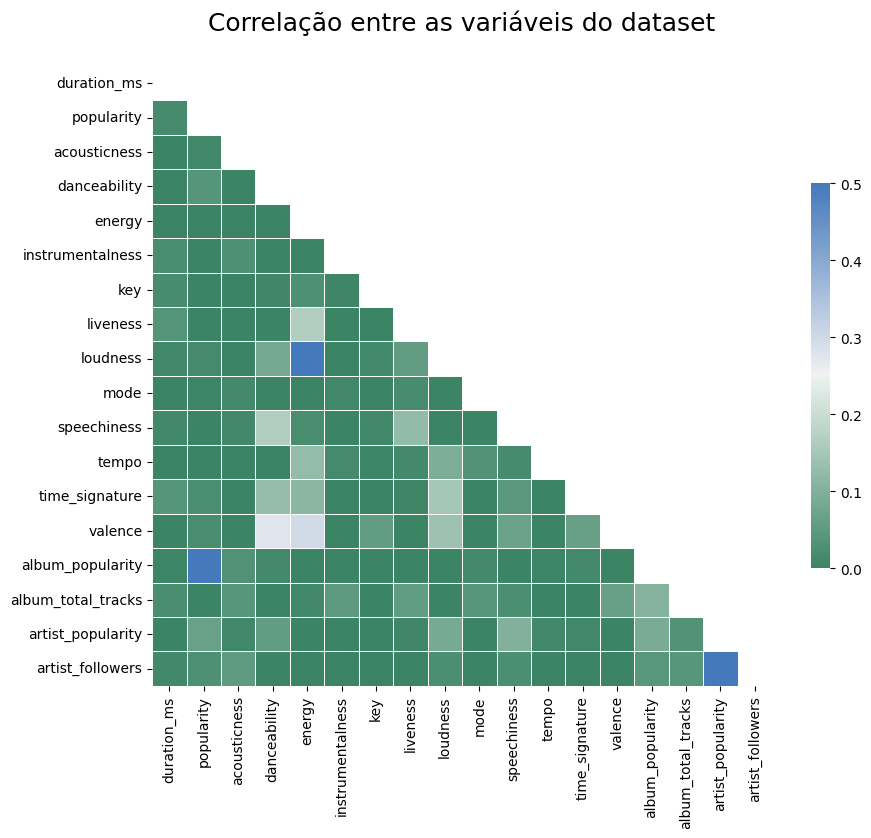

In [12]:
plt.figure(figsize=(10, 10))

colunas_nao_usadas = ['explicit']

mask = np.triu(np.ones_like(df_musicas.drop(columns=colunas_nao_usadas).corr(), dtype=bool))
cmap = sns.diverging_palette(150, 250, as_cmap=True)

sns.heatmap(
    df_musicas.drop(columns=colunas_nao_usadas).corr(), 
    mask=mask,
    square=True,
    vmin=0, 
    vmax=.5, 
    cmap=cmap,
    linewidths=.5,
    cbar_kws={"shrink": .5}
    )

plt.title('Correlação entre as variáveis do dataset\n', fontsize=18)
plt.show()

Com base nesse mapa de calor, nota-se que, naturalmente, a coluna de "album_popularity" (popularidade do album daquela música) está altamente correlacionada (92%) com "popularity" (popularidade da música). Da mesma forma que "artist_followers" (seguidores do artista) possui uma correlação de 65% com "artist_popularity" (popularidade do artista), o que também é esperado.

Além disso, é interessante notar que as seguintes _feature_ apresentaram certo grau de correlação

- loudness x energy (68%)
- valence x danceability (28%)
- valence x energy (30%)
- valence x loudness (14%)

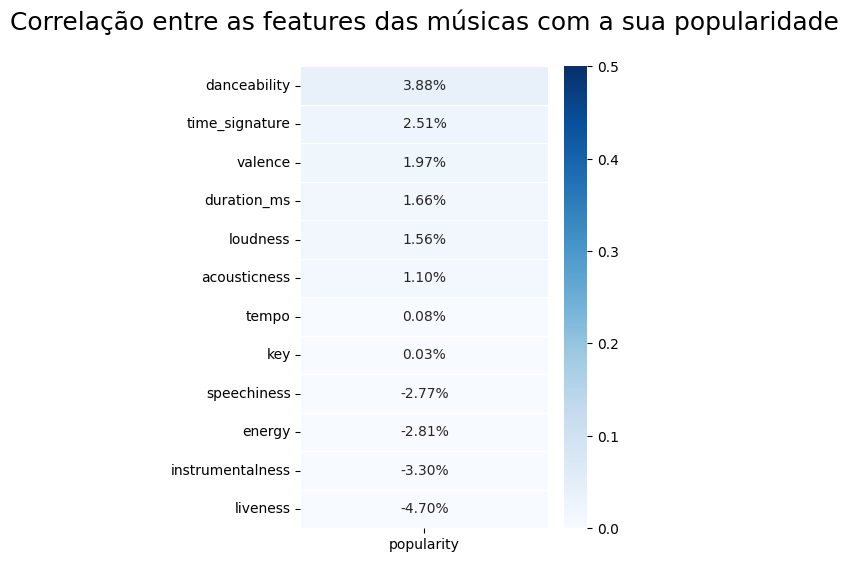

In [13]:
plt.figure(figsize=(4, 6))

colunas_nao_usadas = ['explicit', 'album_popularity', 'artist_popularity', 'artist_followers', 'album_total_tracks', 'mode']

sns.heatmap(
    df_musicas.drop(columns=colunas_nao_usadas).corr()[['popularity']].sort_values(by=['popularity'], ascending=False)[1:],

    annot=True, 
    vmin=0, 
    vmax=.5, 
    cmap='Blues',
    linewidths=.5,
    fmt='.2%'
    )


plt.title('Correlação entre as features das músicas com a sua popularidade\n', fontsize=18)
plt.show()

Análisando o gráfico acima, onde procurou-se encontrar alguma correlação entre as características da música e sua popularidade, nota-se que não há nenhuma regra geral para produzir uma música popular - todas as features apresentaram correlações próximas a zero. Vamos ver se isso se mantém quando analisamos por gênero musical.

In [14]:
generos_artistas = df_musicas['artist_genres'].unique()
print('Gêneros de artistas:', len(generos_artistas)	)

print(generos_artistas)

Gêneros de artistas: 7
['hip hop' 'r&b' 'rap' 'pop' 'rock' 'punk' 'reggae']


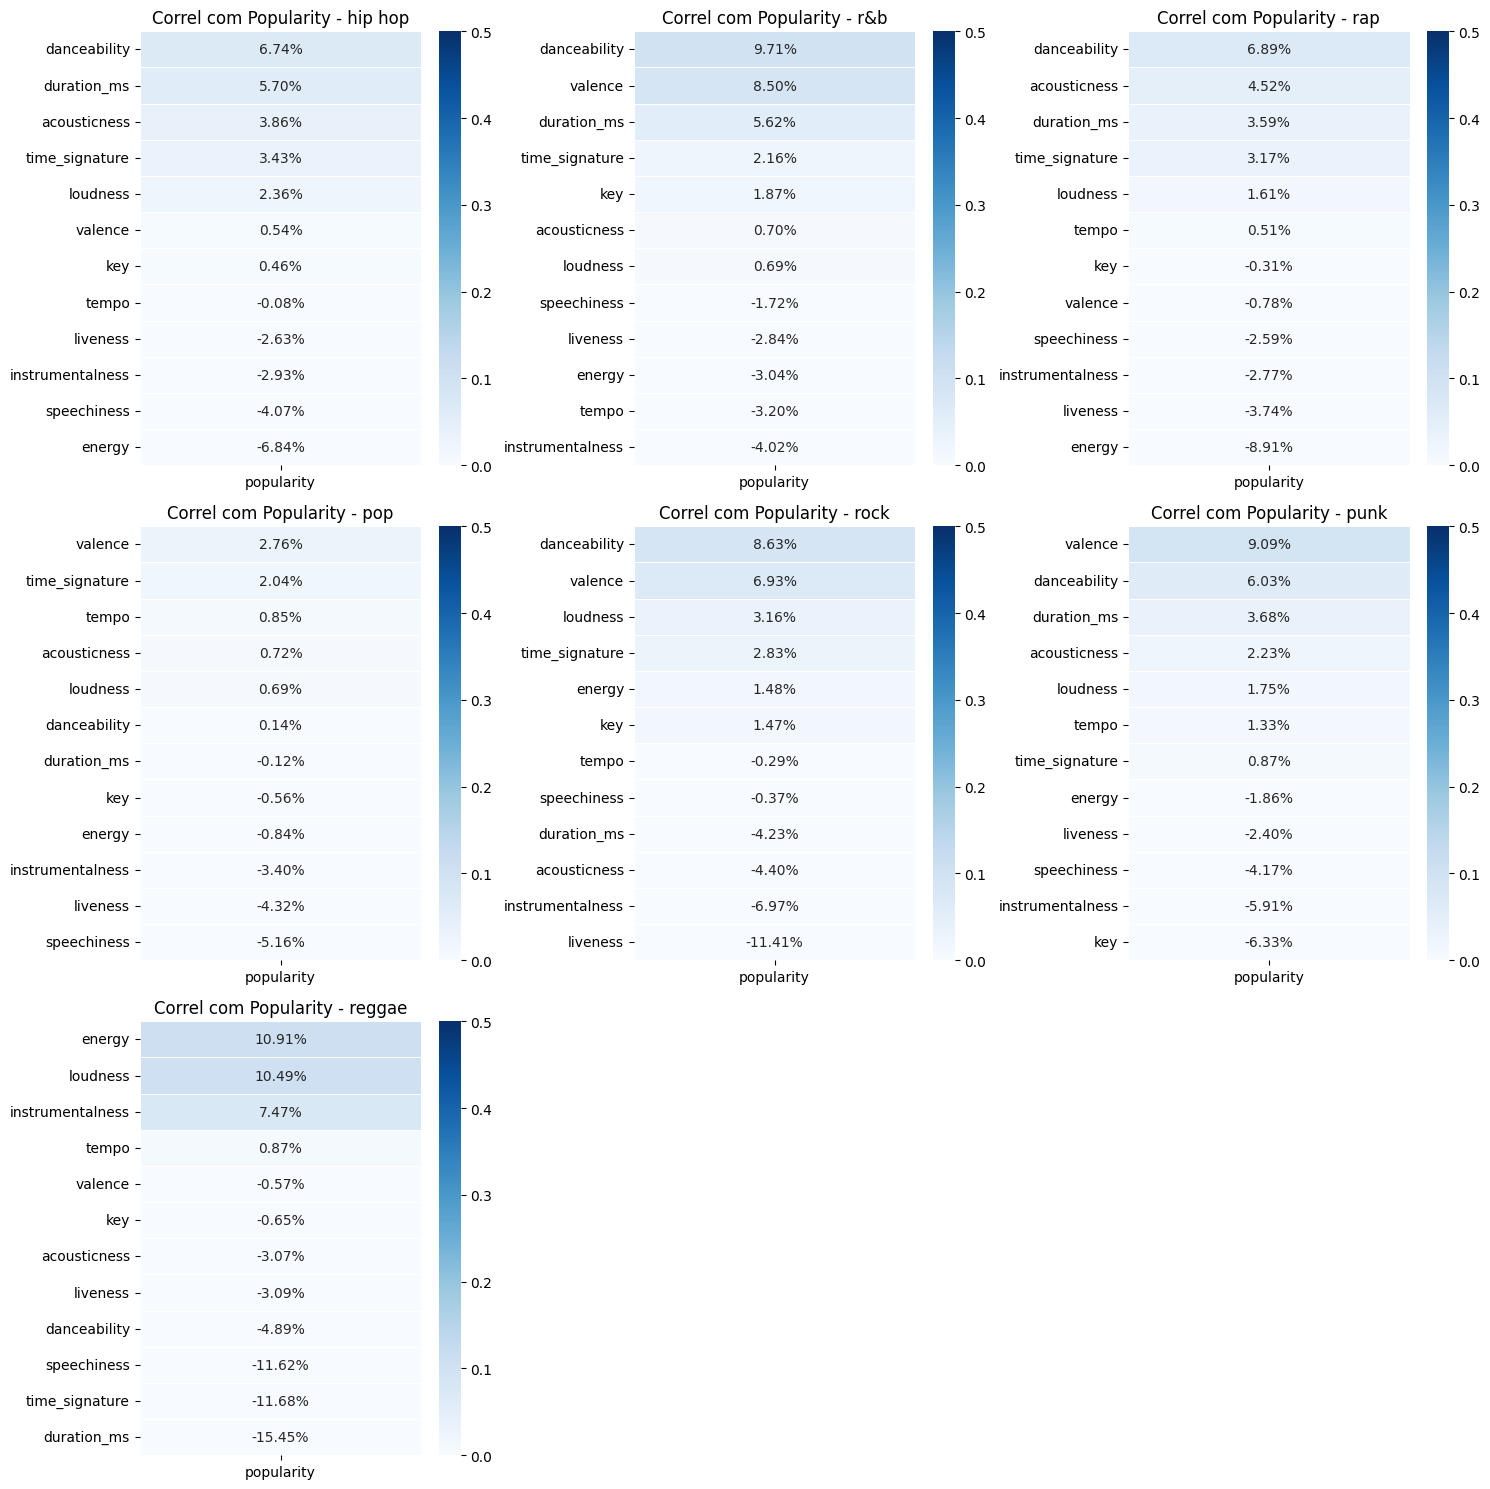

In [15]:
# Cálculo do tamanho da grid
num_plots = len(generos_artistas)
cols = math.ceil(math.sqrt(num_plots))
rows = math.ceil(num_plots / cols)

# Criação da grid de subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i, genero in enumerate(generos_artistas):
    df_genero = df_musicas[df_musicas['artist_genres'] == genero]
    correl = df_genero.drop(columns=colunas_nao_usadas).corr()[['popularity']].sort_values(by=['popularity'], ascending=False).drop('popularity')

    # Determinar o índice da subplot atual
    row_idx = i // cols
    col_idx = i % cols

    sns.heatmap(
        correl, 

        annot=True, 
        vmin=0, 
        vmax=.5, 
        cmap='Blues',
        linewidths=.5,
        fmt='.2%',
        ax=axes[row_idx, col_idx]
        
        )
    
    axes[row_idx, col_idx].set_title(f'Correl com Popularity - {genero}')

# Remover subplots vazios
if num_plots < rows * cols:
    for j in range(num_plots, rows * cols):
        fig.delaxes(axes.flatten()[j])

# Ajuste do espaçamento entre as subplots
plt.tight_layout()

# Exibição do gráfico
plt.show()

Observando esses gráficos, nota-se que, o gênero de reggae foi o que apresentou uma maior correlação entre features: energy (11%) e loudness (10%), sendo o único gênero onde a energy ficou nas primeiras posições de correlação e a duração da música ficou em último lugar, com correlação negativa de -15%, ou seja, quanto maior a duração da música, menor a popularidade.

Nota-se, também, que o fator de danceability é relevante para vários gêneros, em especial Rock, Punk, R&B, Hip-Hop e Rap.

### 4.2 Distribuição das variáveis

A ideia aqui é entender como as features se distribuem no dataset completo, para entender se há algum tipo de _outlier_, e também entender essas distribuições por gênero musical, a fim de entender se há alguma característica que se destaca.

In [16]:
df_musicas.columns

Index(['explicit', 'duration_ms', 'popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'album_name',
       'album_popularity', 'album_release_date', 'album_total_tracks',
       'album_type', 'artist_name', 'artist_genres', 'artist_popularity',
       'artist_type', 'artist_followers'],
      dtype='object')

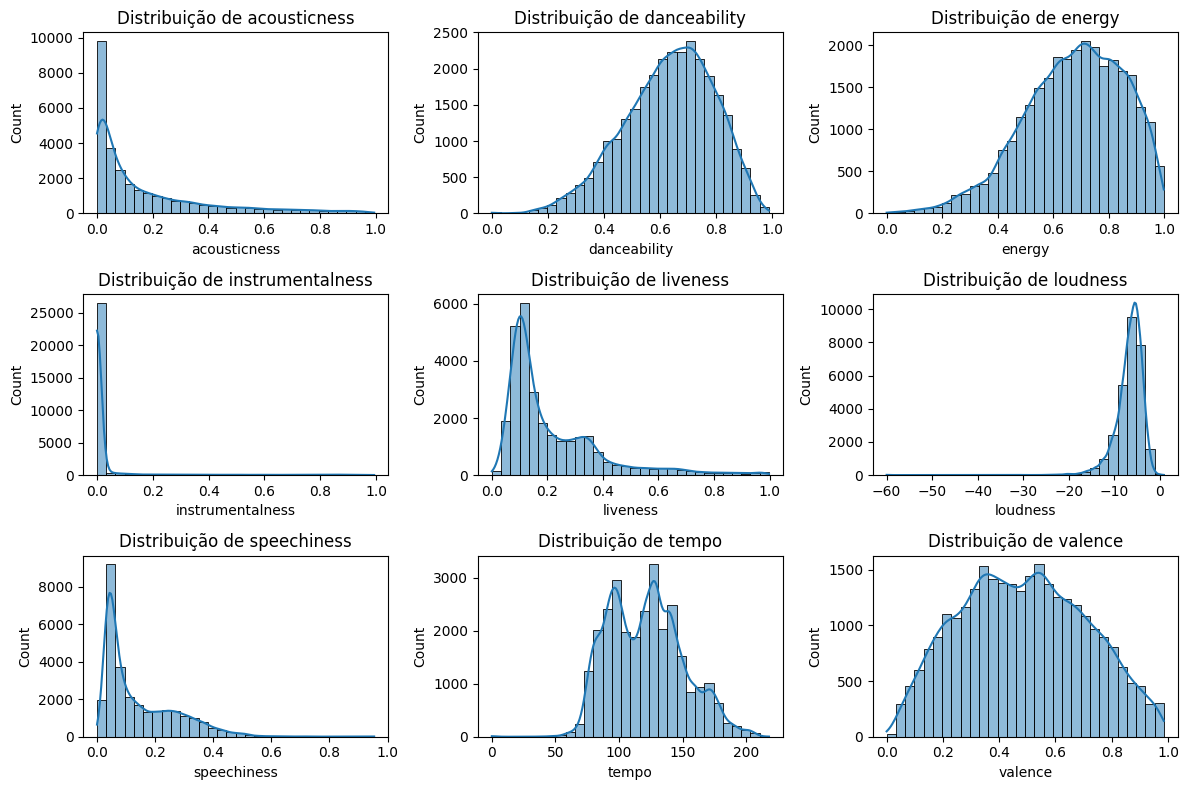

In [17]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Criação da grid de subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, feature in enumerate(features):

    # Determinar o índice da subplot atual
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(
        df_musicas[feature], 
        kde=True,
        ax=axes[row_idx, col_idx],
        bins=30
        )
    
    axes[row_idx, col_idx].set_title(f'Distribuição de {feature}')


# Ajuste do espaçamento entre as subplots
plt.tight_layout()

# Exibição do gráfico
plt.show()

Olhando as distribuições das features para o dataset completo, não se tira nenhuma conclusão relevante, pois não há com o que comparar. Dessa forma, vamos ver como as distribuições variam conforme os diferentes gêneros musicais.

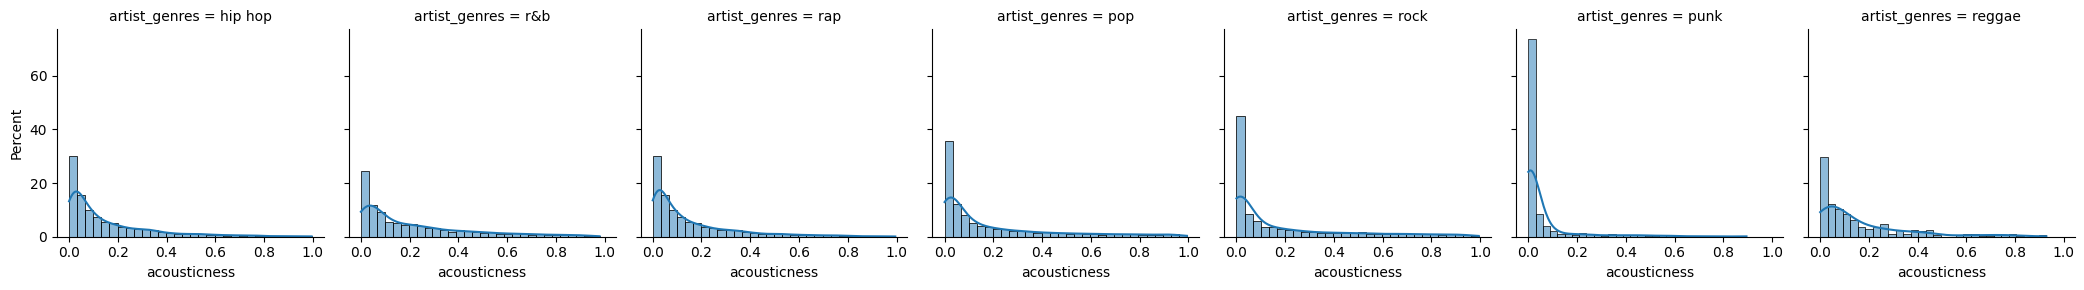

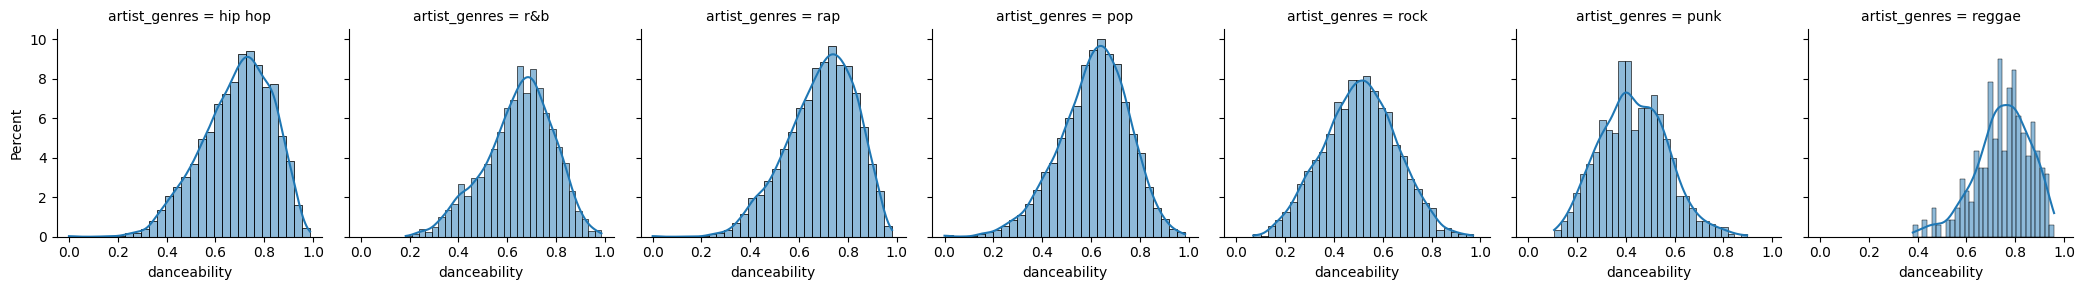

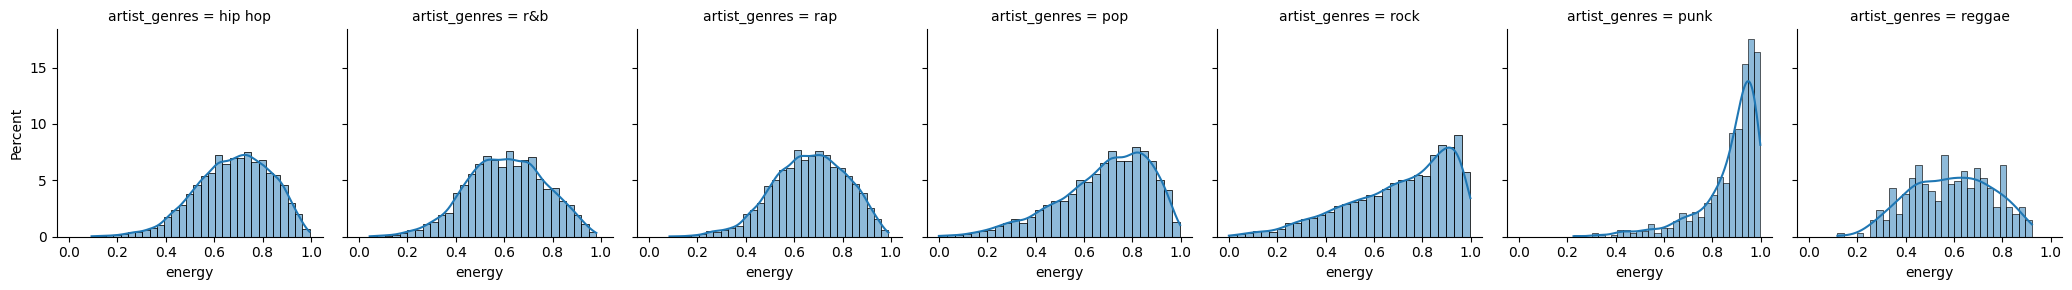

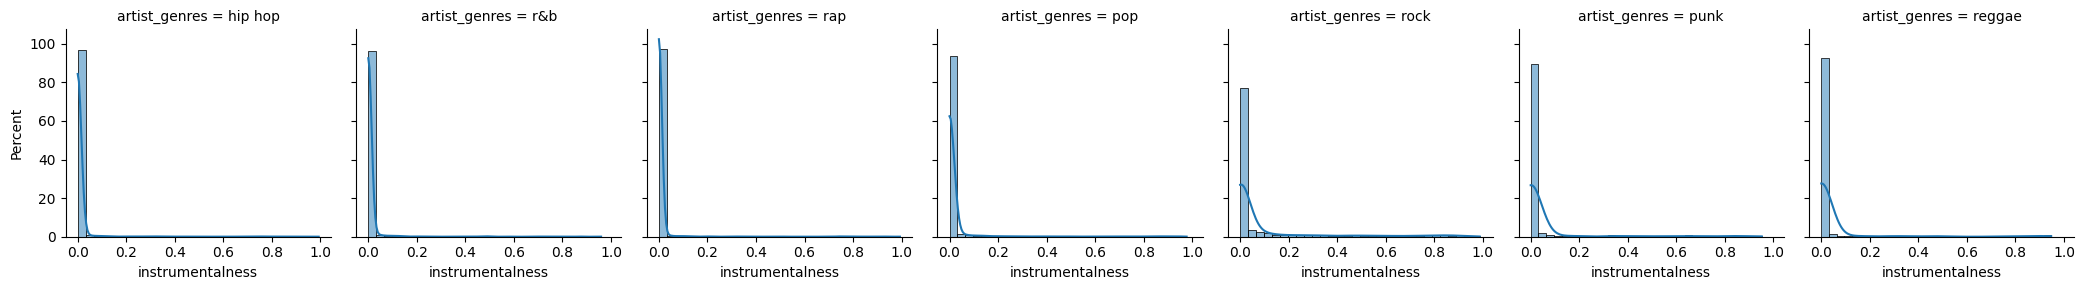

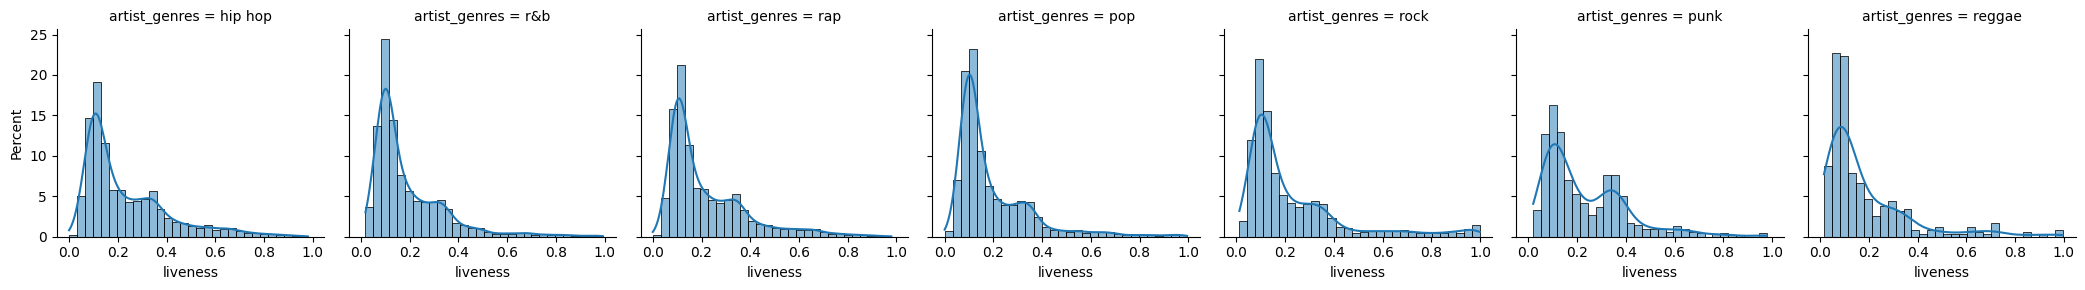

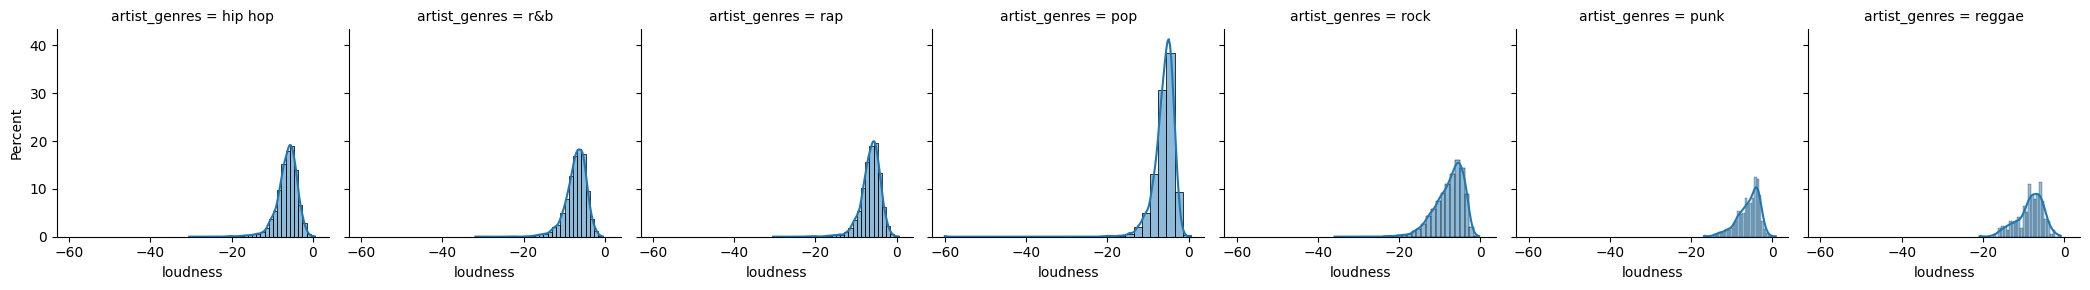

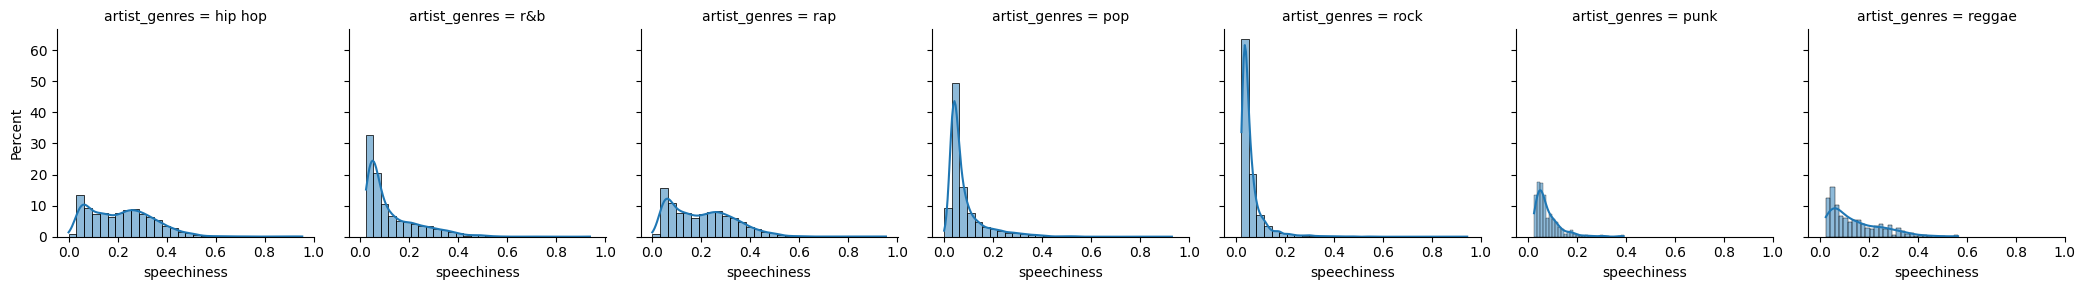

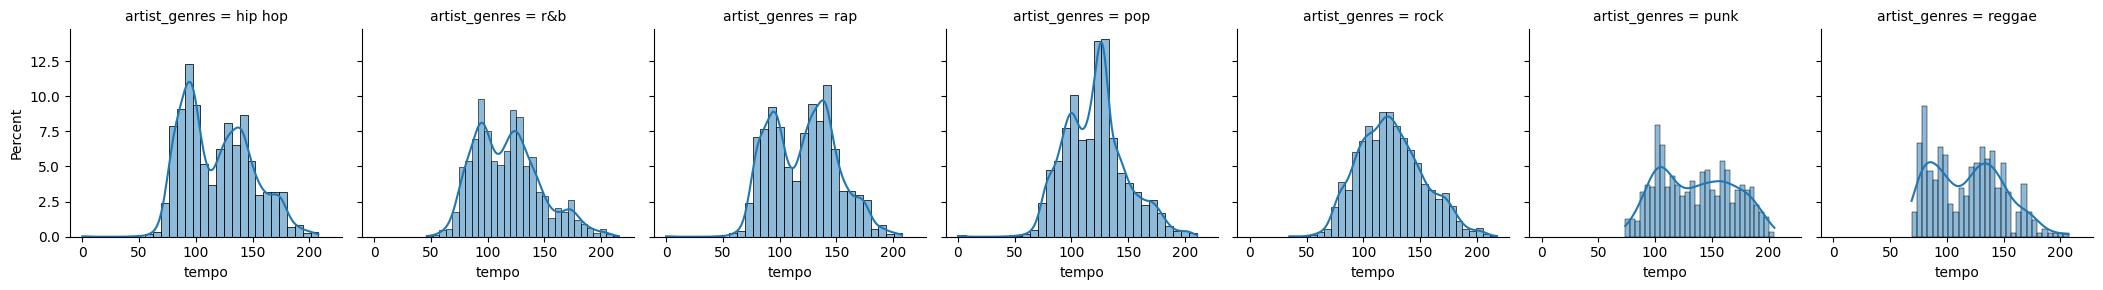

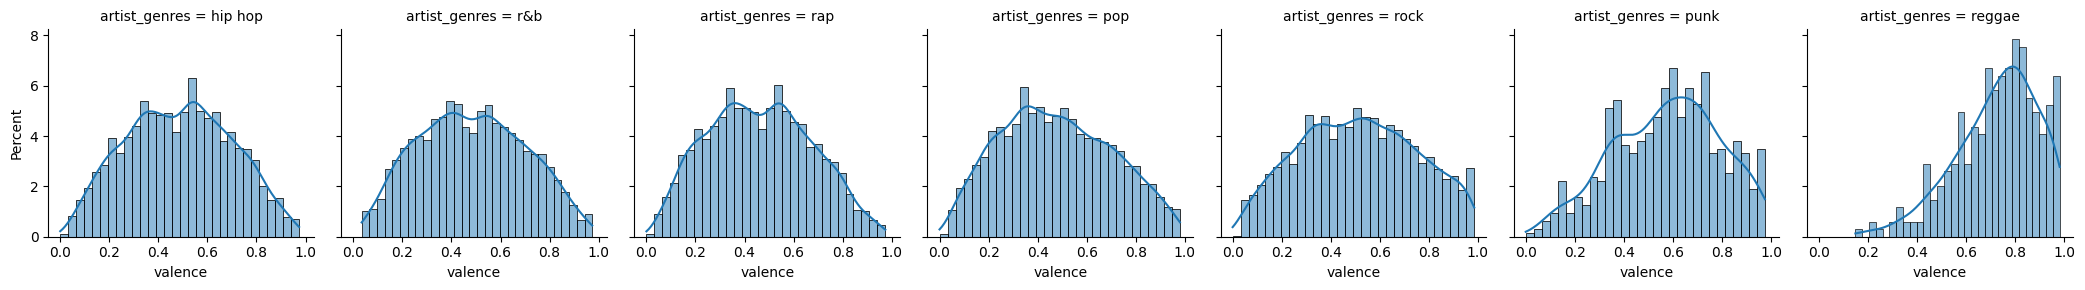

In [18]:
for feature in features:
    plt.rcParams['figure.figsize'] = (20,7)
    g = sns.FacetGrid(df_musicas, col='artist_genres')
    g.map(sns.histplot, feature, kde=True, bins=30, stat='percent')
    plt.show()

Como era de se esperar, cada gênero músical possui uma distribuição diferente para cada _feature_. Por exemplo, o gênero rock e punk apresentou maiores valores de _energy_ do que os outros. O gênero reggae apresentou os menores valores de _energy_ e os maiores de _valence_ e _danceability_.

### 4.3 Tratamento de Outliers

Para cada feature e para cada gênero, foi calculado o intervalo interquartil (IQR) e, em seguida, os valores que estavam fora desse intervalo foram considerados outliers e removidos.

In [19]:
def remover_outliers_por_genero(df, coluna):
    # Conta quantas linhas tinha antes
    num_linhas_antes = df.shape[0]

    # Cálculo dos limites do intervalo interquartil (IQR) por gênero
    q1 = df.groupby('artist_genres')[coluna].quantile(0.25)
    q3 = df.groupby('artist_genres')[coluna].quantile(0.75)
    iqr = q3 - q1

    # Cálculo dos limites inferior e superior para determinar os outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Função para filtrar os outliers por gênero
    def filter_outliers_by_genre(group):
        genre = group.name
        return group[(group[coluna] >= lower_bound[genre]) & (group[coluna] <= upper_bound[genre])]

    # Aplicar a função de filtro aos grupos por gênero
    df_filtered = df.groupby('artist_genres').apply(filter_outliers_by_genre).reset_index(drop=True)

    # Conta quantas linhas tem depois
    num_linhas_depois = df_filtered.shape[0]

    # Calcula a diferença
    diferenca = num_linhas_antes - num_linhas_depois

    return df_filtered, diferenca

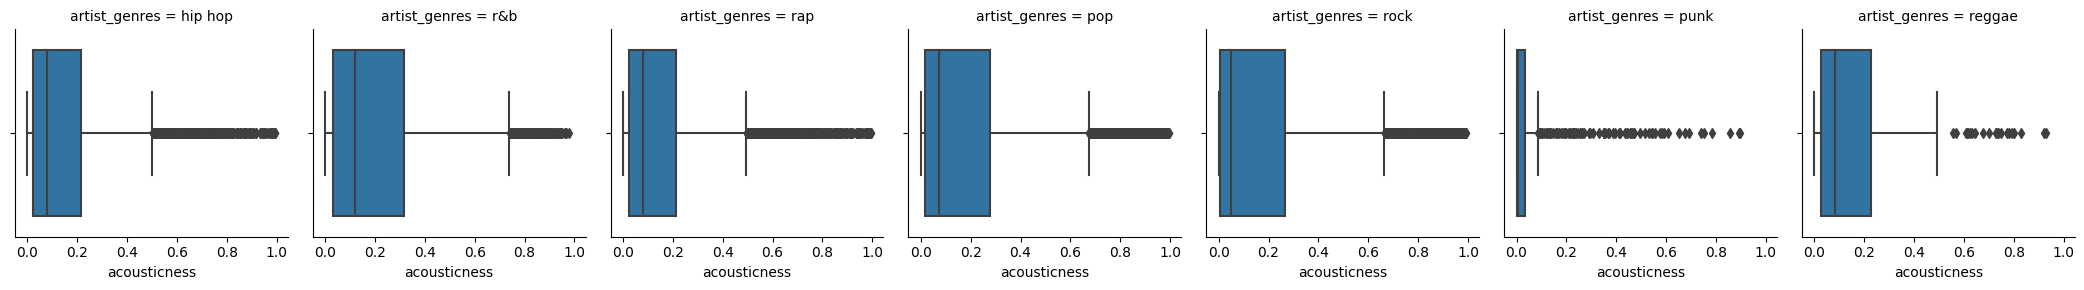

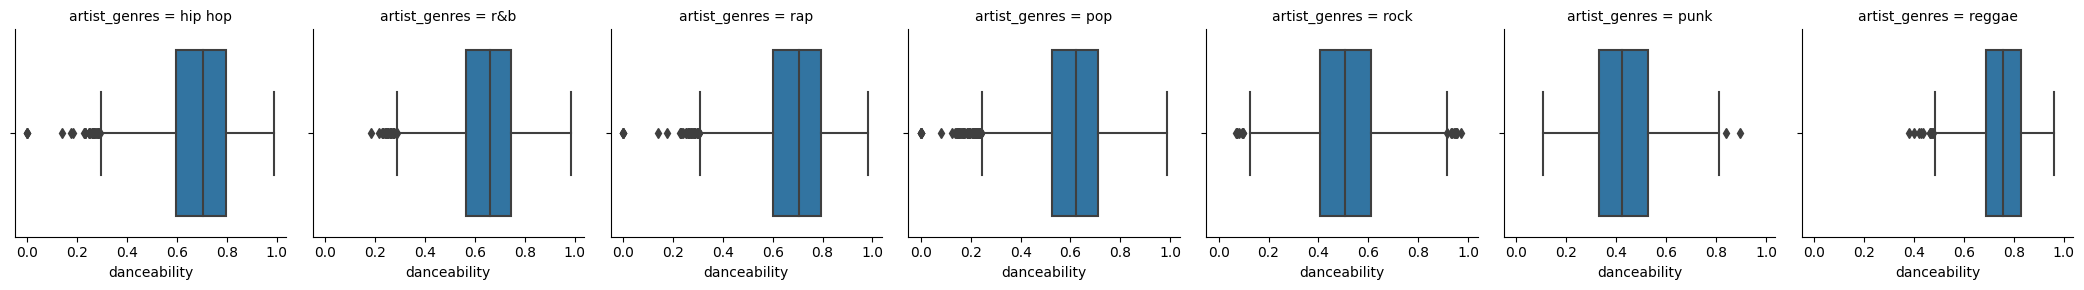

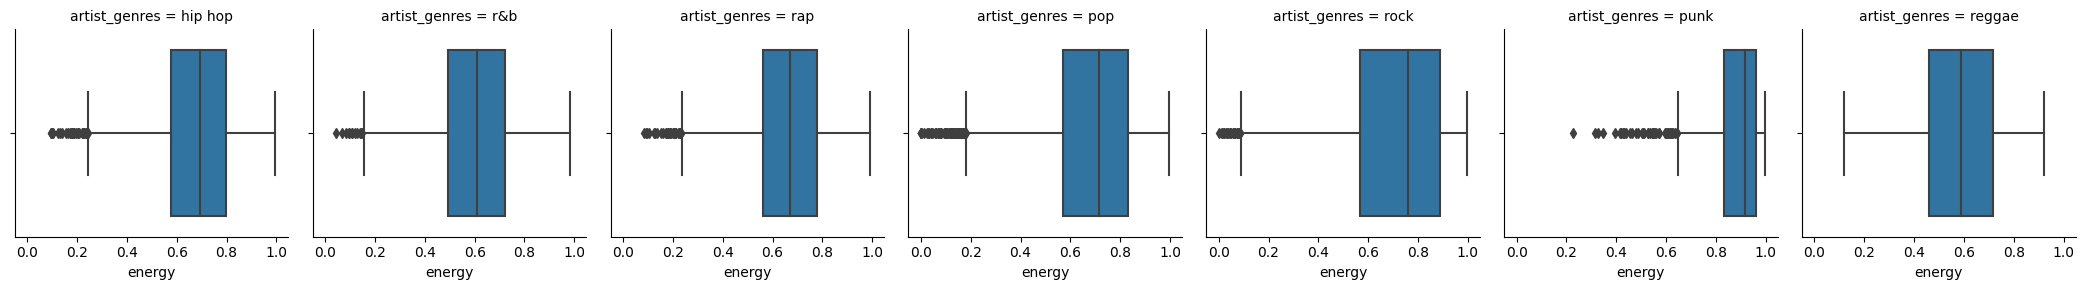

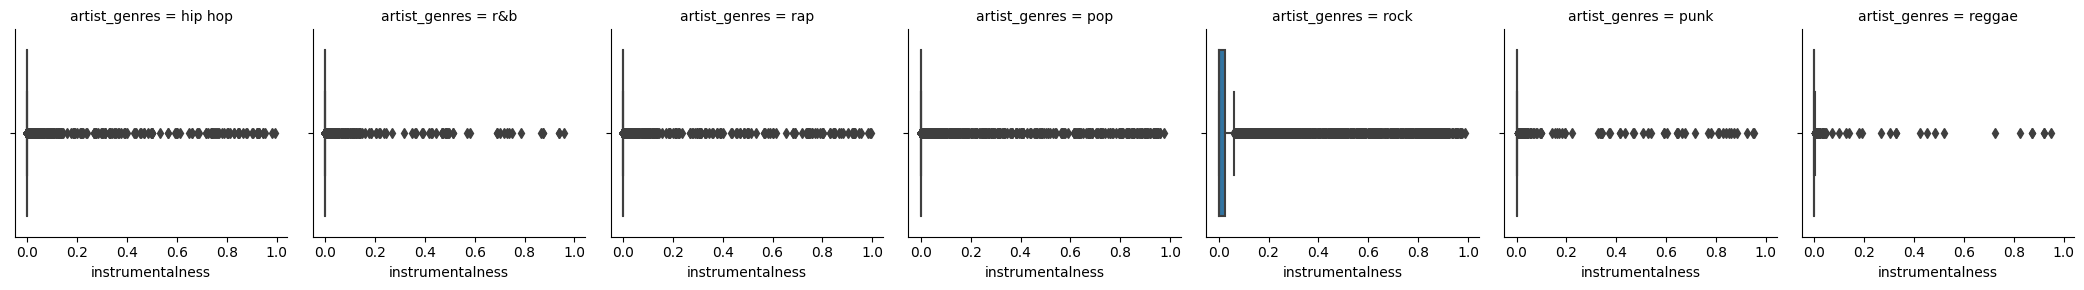

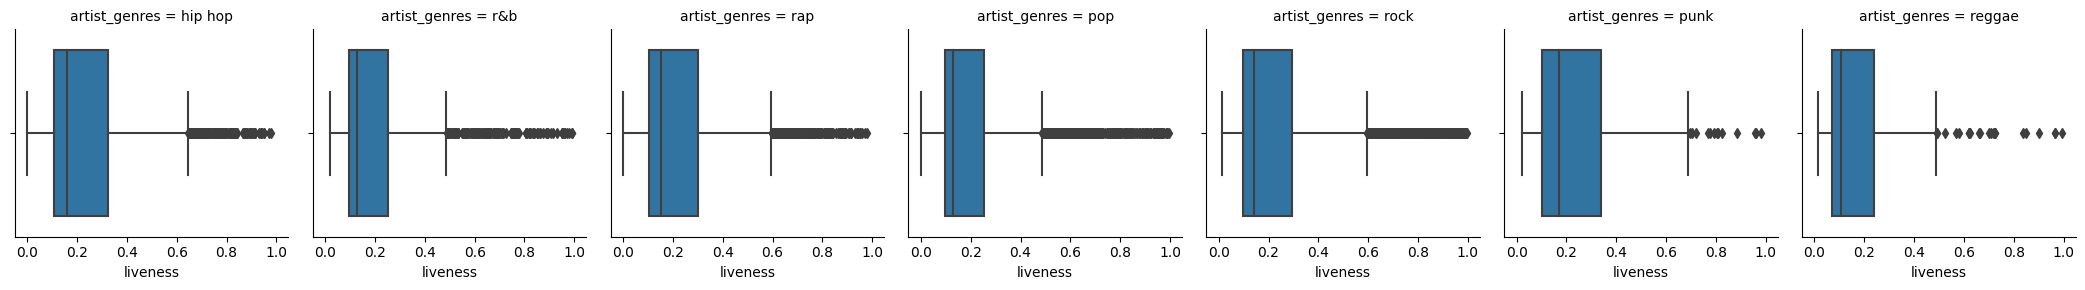

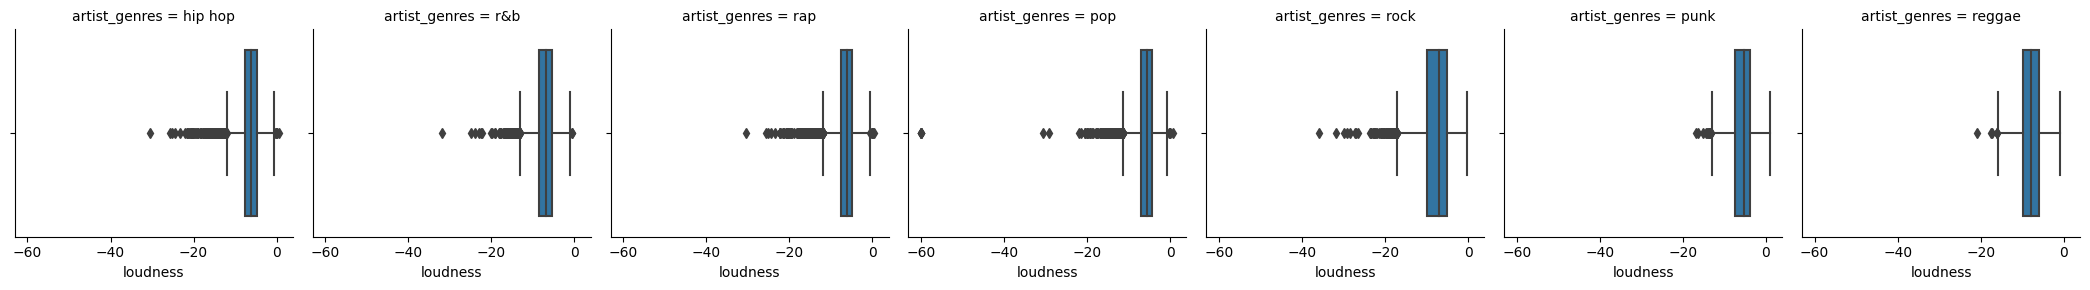

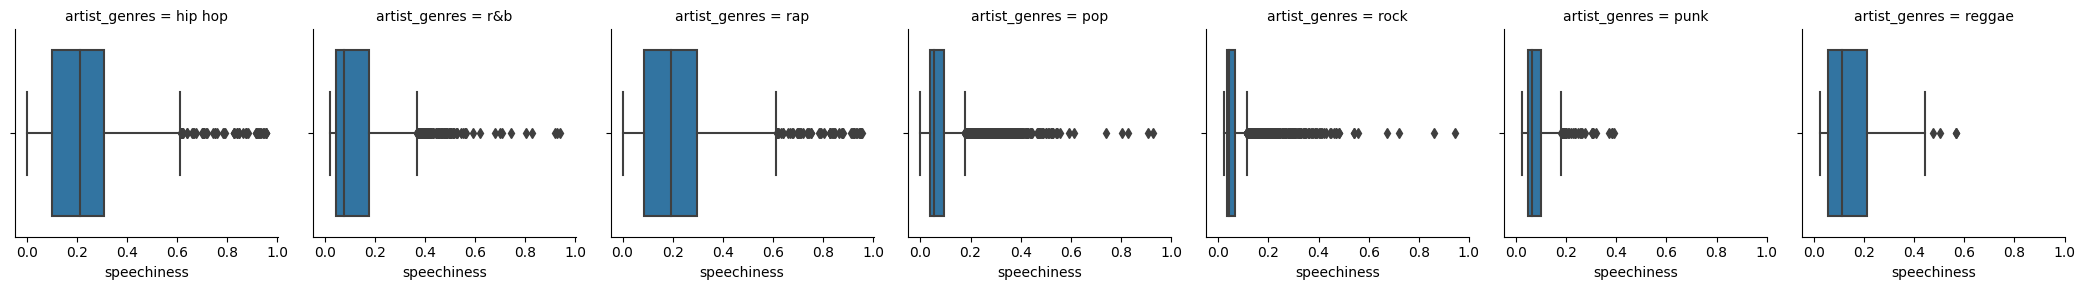

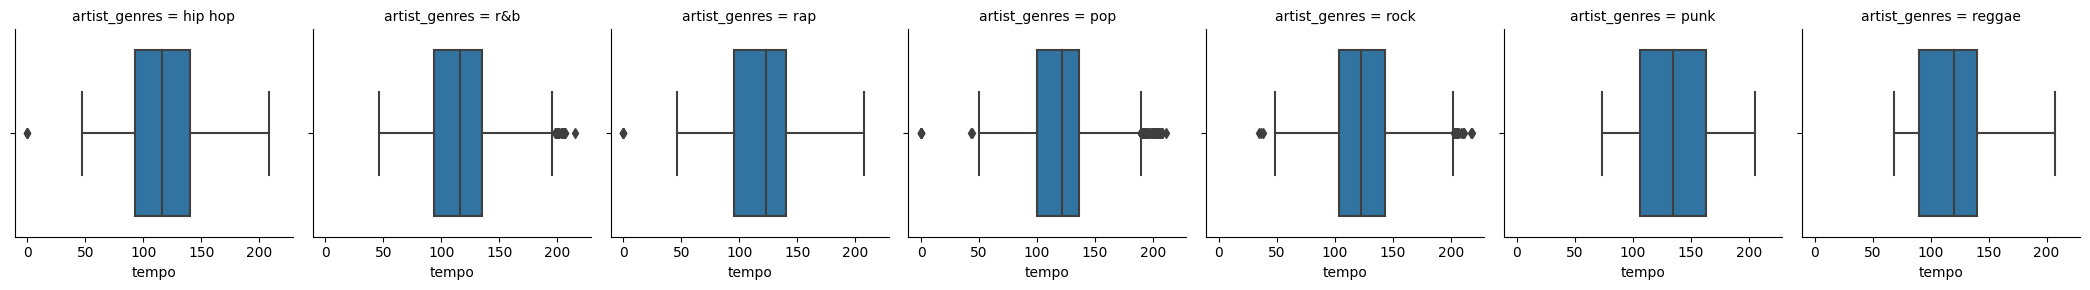

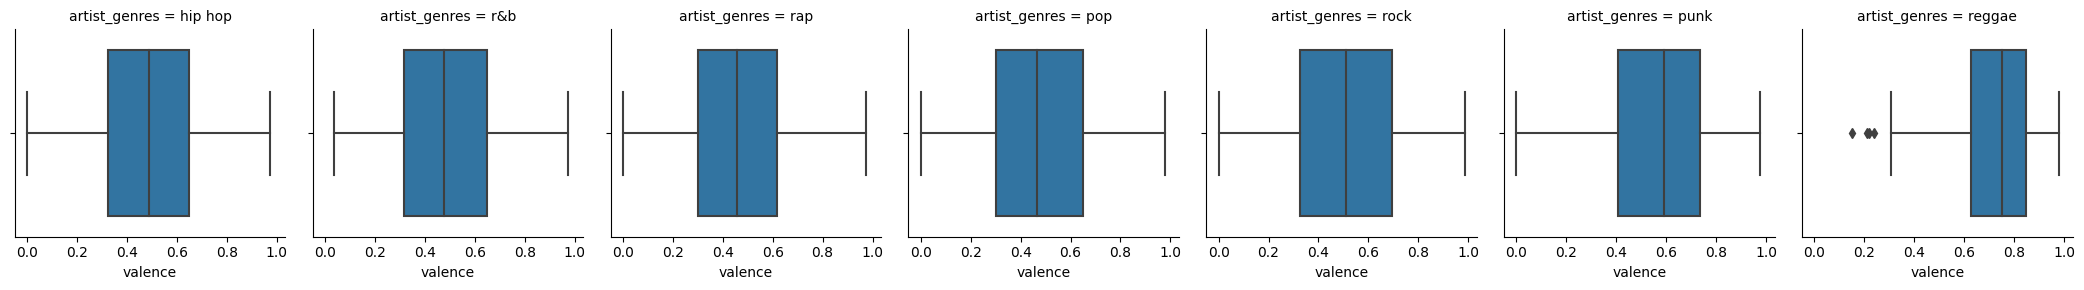

In [20]:
# Para todas as colunas númericas, plota o boxplot por gênero

for feature in features:
    plt.rcParams['figure.figsize'] = (20,7)
    g = sns.FacetGrid(df_musicas, col='artist_genres')
    g.map(sns.boxplot, feature, order=df_musicas['artist_genres'].unique())
    plt.show()

In [21]:
# Excluir os outliers de cada feature para cada gênero

df_musicas_sem_outliers = df_musicas.copy()
for feature in features:
    df_musicas_sem_outliers, num_linhas_removidas = remover_outliers_por_genero(df_musicas_sem_outliers, feature)
    print(f'Feature: {feature} - Linhas removidas: {num_linhas_removidas}')

# df_musicas_sem_outliers, num_linhas_removidas = remover_outliers_por_genero(df_musicas_sem_outliers, 'acousticness')
# print(f'Linhas removidas: {num_linhas_removidas}')


Feature: acousticness - Linhas removidas: 2086
Feature: danceability - Linhas removidas: 168
Feature: energy - Linhas removidas: 114
Feature: instrumentalness - Linhas removidas: 5493
Feature: liveness - Linhas removidas: 1001
Feature: loudness - Linhas removidas: 445
Feature: speechiness - Linhas removidas: 825
Feature: tempo - Linhas removidas: 85
Feature: valence - Linhas removidas: 6


Vamos ver como ficou a distribuição de cada variável após o tratamento de outliers.

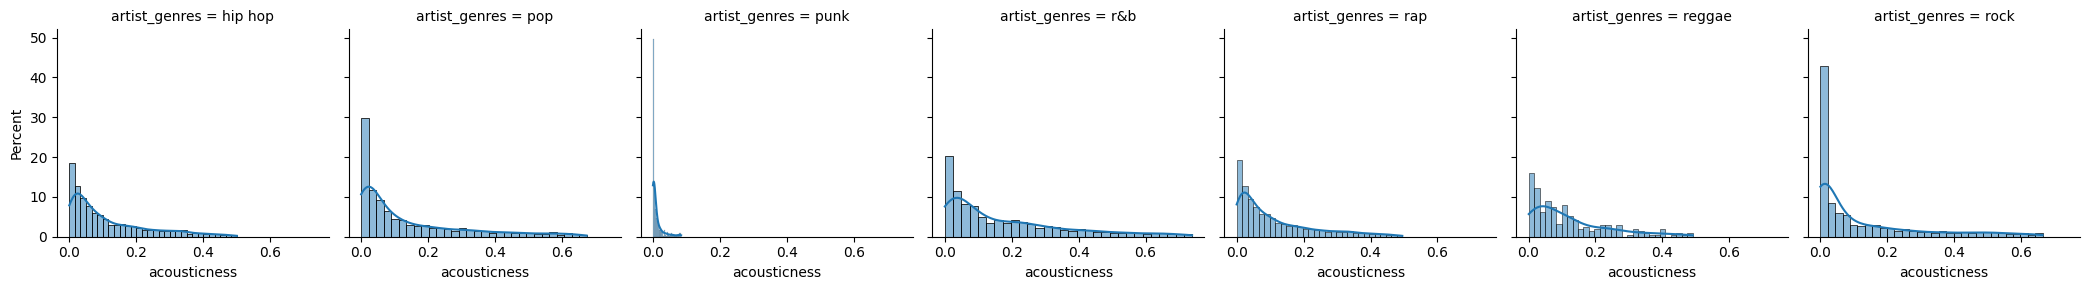

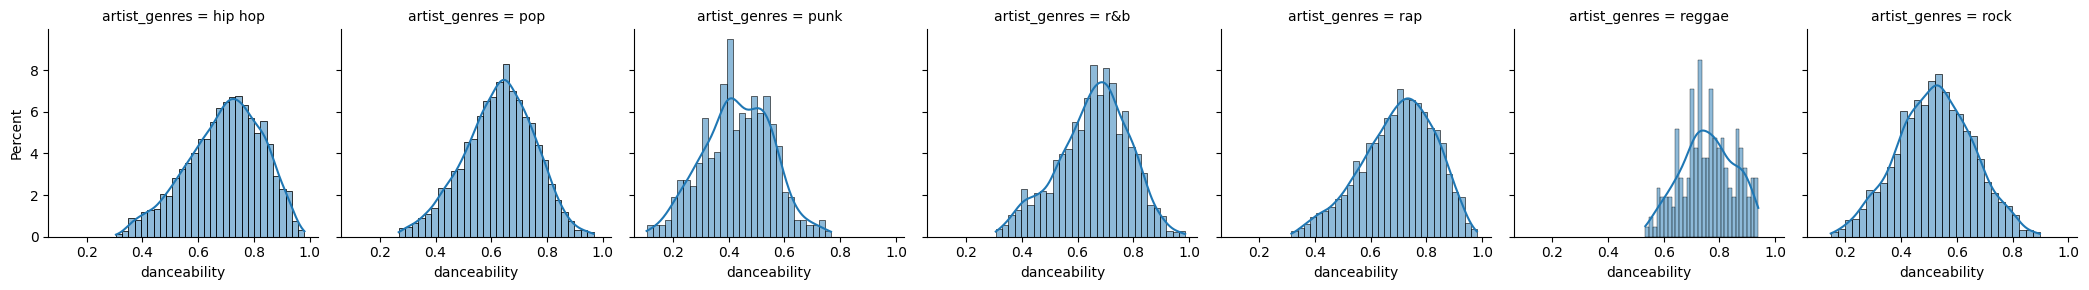

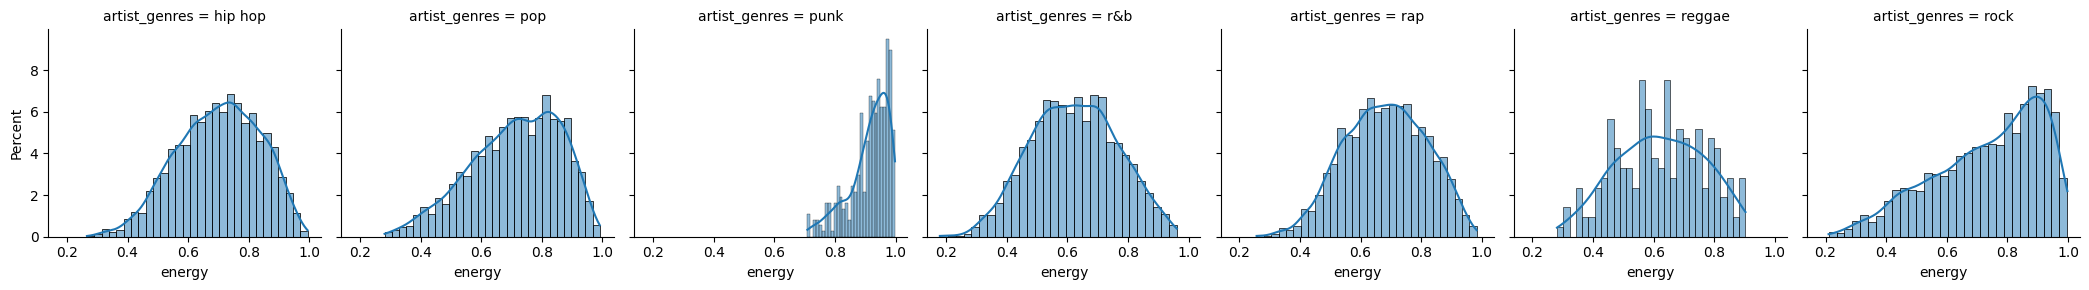

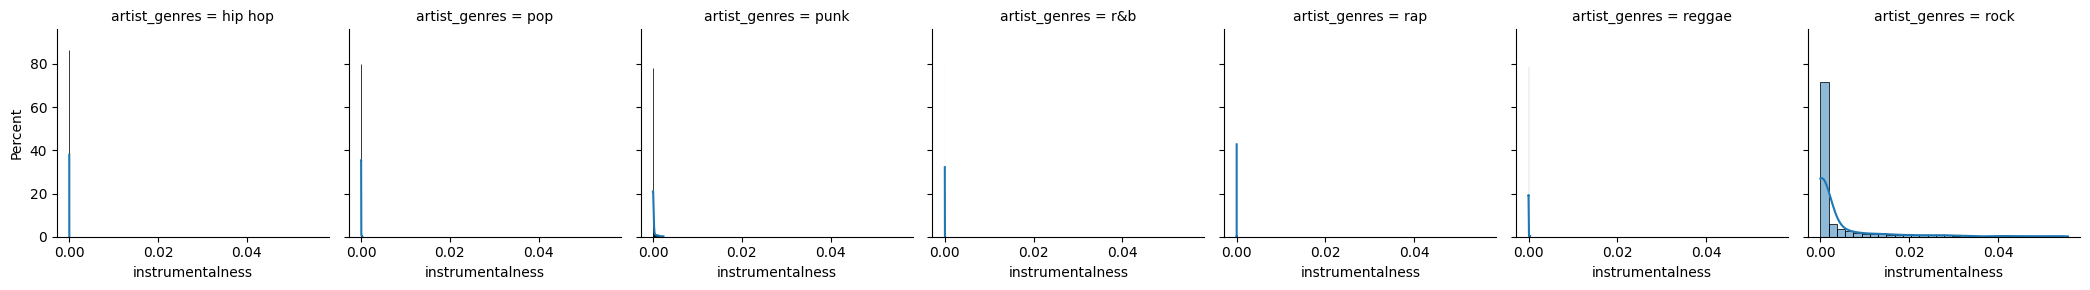

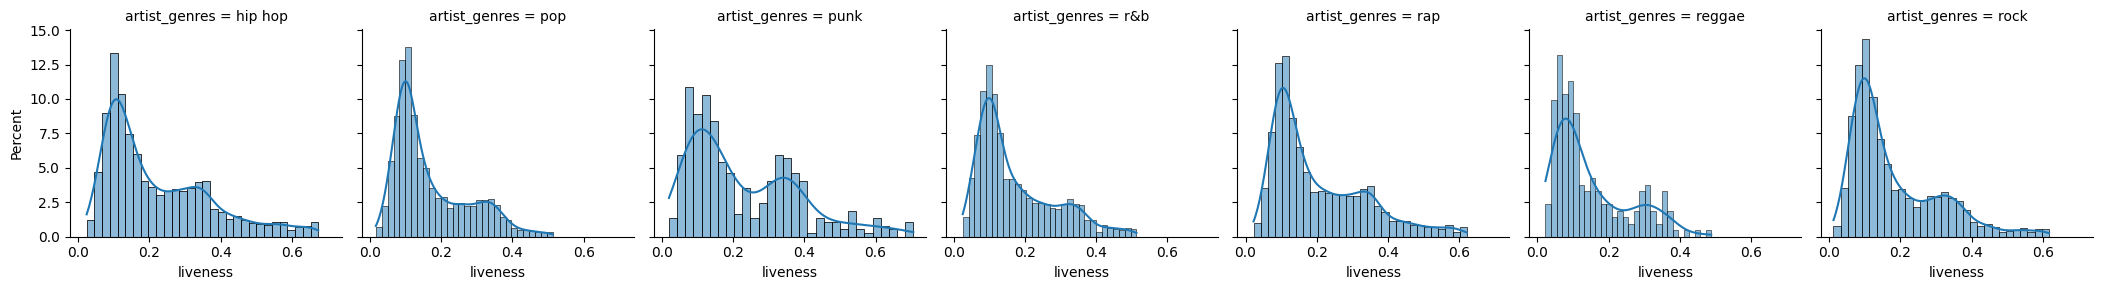

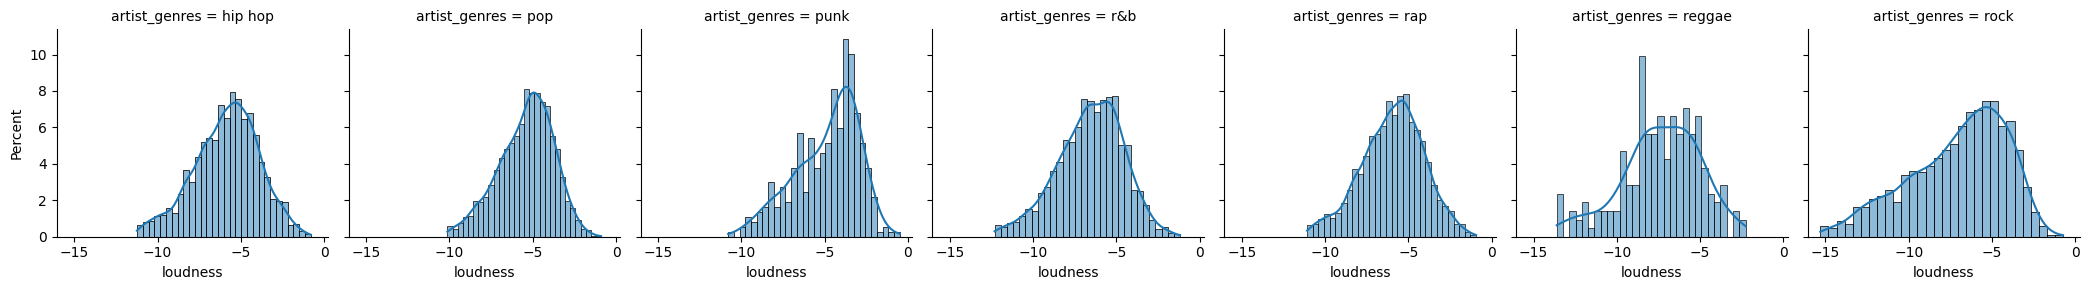

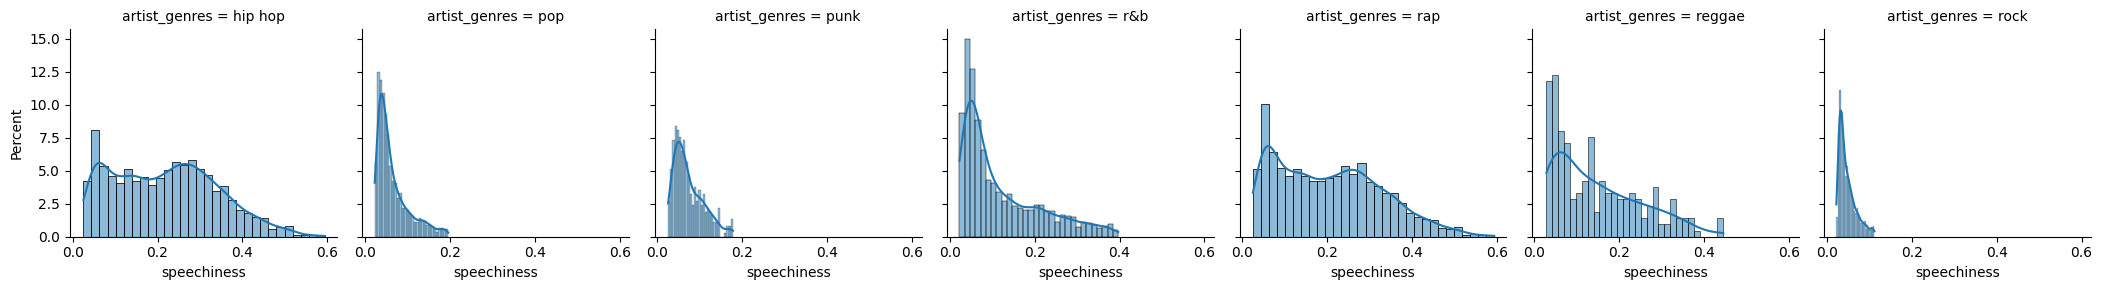

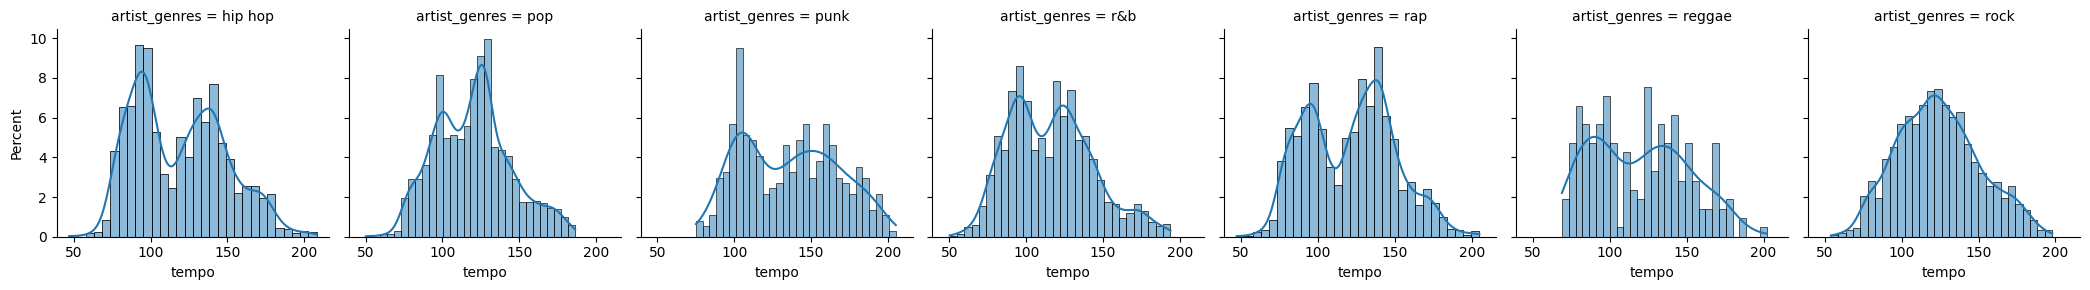

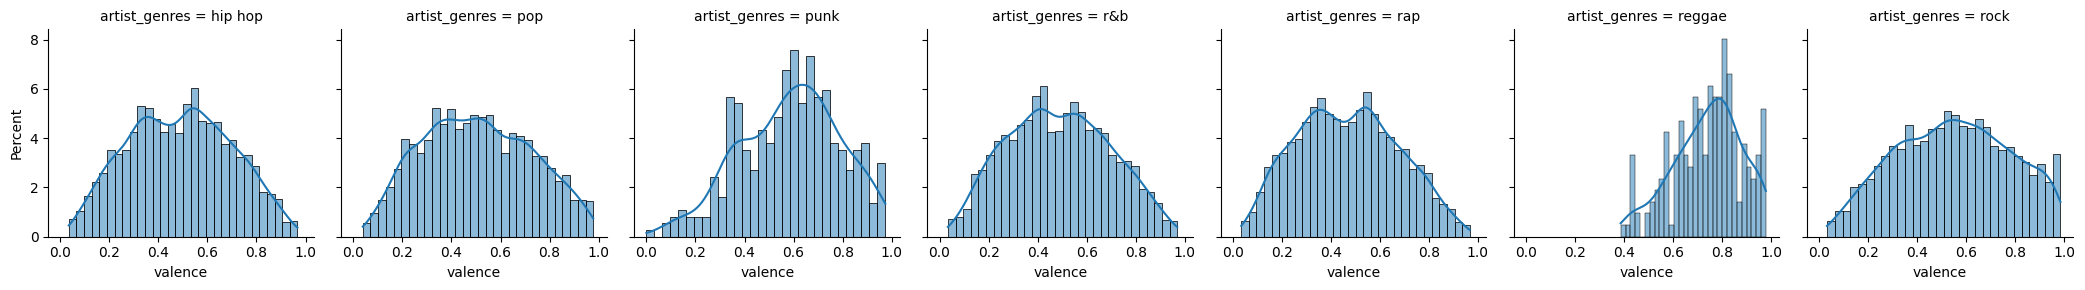

In [22]:
# Para todas as colunas númericas, plota a distribuição por gênero

for feature in features:
    plt.rcParams['figure.figsize'] = (20,7)
    g = sns.FacetGrid(df_musicas_sem_outliers, col='artist_genres')
    g.map(sns.histplot, feature, kde=True, bins=30, stat='percent')
    plt.show()

Com o tratamento de outliers, nota-que as distribuições se aproximaram de uma distribuição normal. Aqui, na feature de _danceability_, o genero punk apresentou os menos valores, enquanto reggae os maiores. Em _energy_, Rock e Punk apresentaram os maiores valores, enquanto Reggae os menores. Outra feature interessante é a _speechness_, onde o gênero hip-hop e o rap apresentaram os maiores valores.

## 5. Análise de Dados

1. Quais são os Top 1 artistas mais populares de cada gênero? Quais as características das músicas deles diferem da média do seu gênero?

2. Como foi a evolução do lançamento de músicas por gênero ao longo dos anos? Como foi a evolução das features (loudness, danceability) ao longo dos anos?

### 5.1 Comparação do Top 1 artista de cada gênero com a média do seu gênero

In [23]:
# Pega o top 1 artista de cada genero, ordenado por popularidade

df_top_artists = df_musicas_sem_outliers.groupby(['artist_genres', 'artist_name']).max().sort_values(by=['artist_popularity'], ascending=False).reset_index().groupby('artist_genres').head(1)[['artist_name', 'artist_genres', 'artist_popularity']].reset_index(drop = True)
df_top_artists

,artist_name,artist_genres,artist_popularity
0,Taylor Swift,pop,100
1,Drake,hip hop,96
2,Drake,rap,96
3,SZA,r&b,90
4,Imagine Dragons,rock,88
5,Bob Marley & The Wailers,reggae,79
6,Green Day,punk,79


In [24]:
# Faz a média de cada gênero por features 

df_means = df_musicas_sem_outliers.groupby('artist_genres').mean()[features].reset_index()
df_means['artist_name'] = 'Média'
df_means

,artist_genres,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,artist_name
0,hip hop,0.115281,0.694415,0.699494,5.699723e-07,0.223162,-5.871314,0.219031,119.084062,0.488953,Média
1,pop,0.138561,0.627524,0.712321,1.374562e-05,0.168499,-5.404185,0.065521,120.007686,0.505290,Média
2,punk,0.010628,0.431081,0.914238,1.533948e-04,0.230672,-4.872287,0.073578,135.858095,0.586829,Média
3,r&b,0.179425,0.656620,0.622730,2.757571e-06,0.172562,-6.573875,0.120208,116.250849,0.486823,Média
4,rap,0.112758,0.698409,0.681141,2.062103e-07,0.203539,-5.947532,0.205896,121.323015,0.469953,Média
5,reggae,0.120168,0.758231,0.622953,2.270335e-05,0.148338,-7.375038,0.147621,119.367014,0.742000,Média
6,rock,0.125438,0.521476,0.735931,4.360767e-03,0.182234,-7.067376,0.047579,124.163044,0.548152,Média


In [25]:
# Pega o top 1 artista de cada genero, ordenado por popularidade e faz a média de cada feature

df_mean_top_artist = pd.DataFrame(columns=['artist_name'] + features)

for artist, genre in zip(df_top_artists['artist_name'],df_top_artists['artist_genres']):
    artist_mean = df_musicas_sem_outliers[df_musicas_sem_outliers['artist_name'] == artist][features].mean()
    artist_mean['artist_name'] = artist
    artist_mean['artist_genres'] = genre

    df_mean_top_artist = df_mean_top_artist.append(artist_mean, ignore_index=True)

df_mean_top_artist = df_mean_top_artist[~df_mean_top_artist['artist_name'].isna()]
df_mean_top_artist.drop(columns=['tempo'], inplace=True)

df_mean_top_artist

,artist_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,artist_genres
0,Taylor Swift,0.148626,0.602871,0.654629,0.00001,0.159485,-5.662629,0.046711,0.42446,pop
1,Drake,0.122406,0.661216,0.638385,0.000001,0.209799,-6.656103,0.248689,0.397304,hip hop
2,Drake,0.122406,0.661216,0.638385,0.000001,0.209799,-6.656103,0.248689,0.397304,rap
3,SZA,0.220996,0.656,0.575043,0.000006,0.125893,-6.79113,0.123863,0.374696,r&b
4,Imagine Dragons,0.121605,0.522853,0.710147,0.003583,0.181887,-6.064162,0.052175,0.360819,rock
5,Bob Marley & The Wailers,0.14098,0.80363,0.501783,0.000043,0.092122,-9.080283,0.15462,0.7545,reggae
6,Green Day,0.023131,0.467625,0.860563,0.000667,0.171279,-4.192854,0.054463,0.6309,punk


In [28]:
features = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'valence'
 ]

Olhando por gênero...

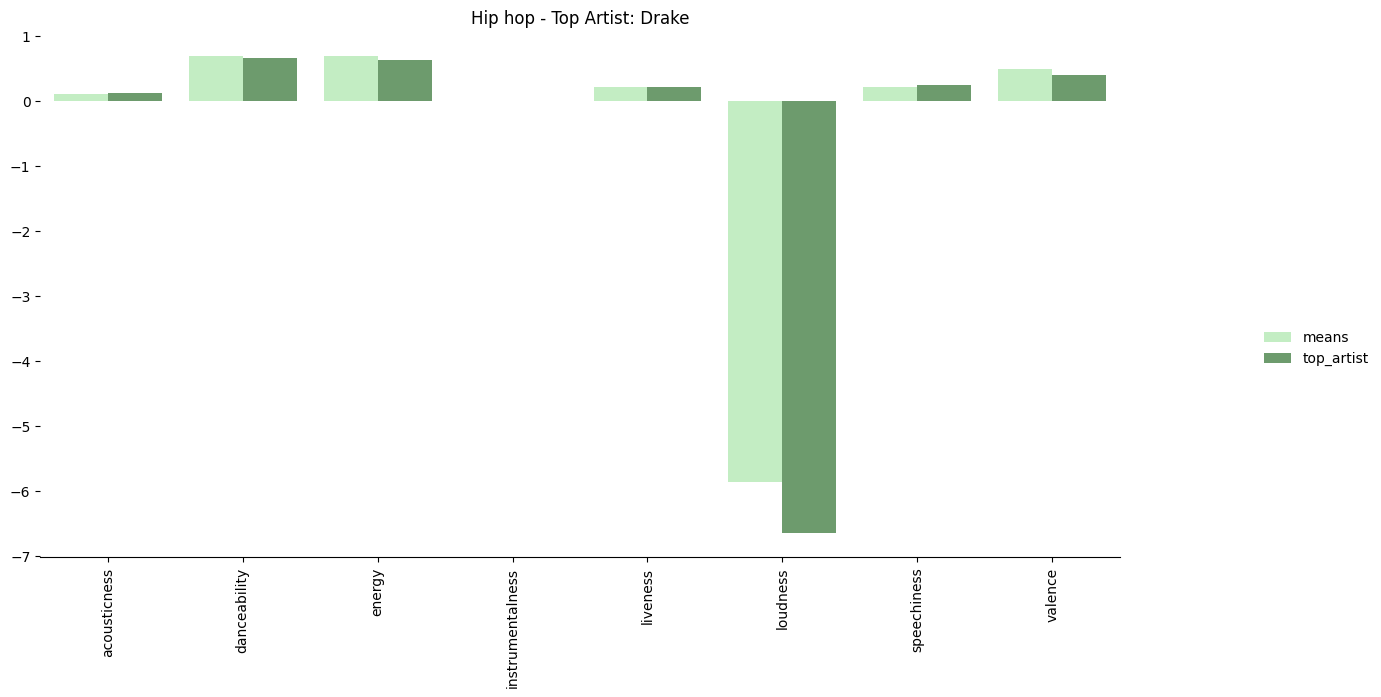

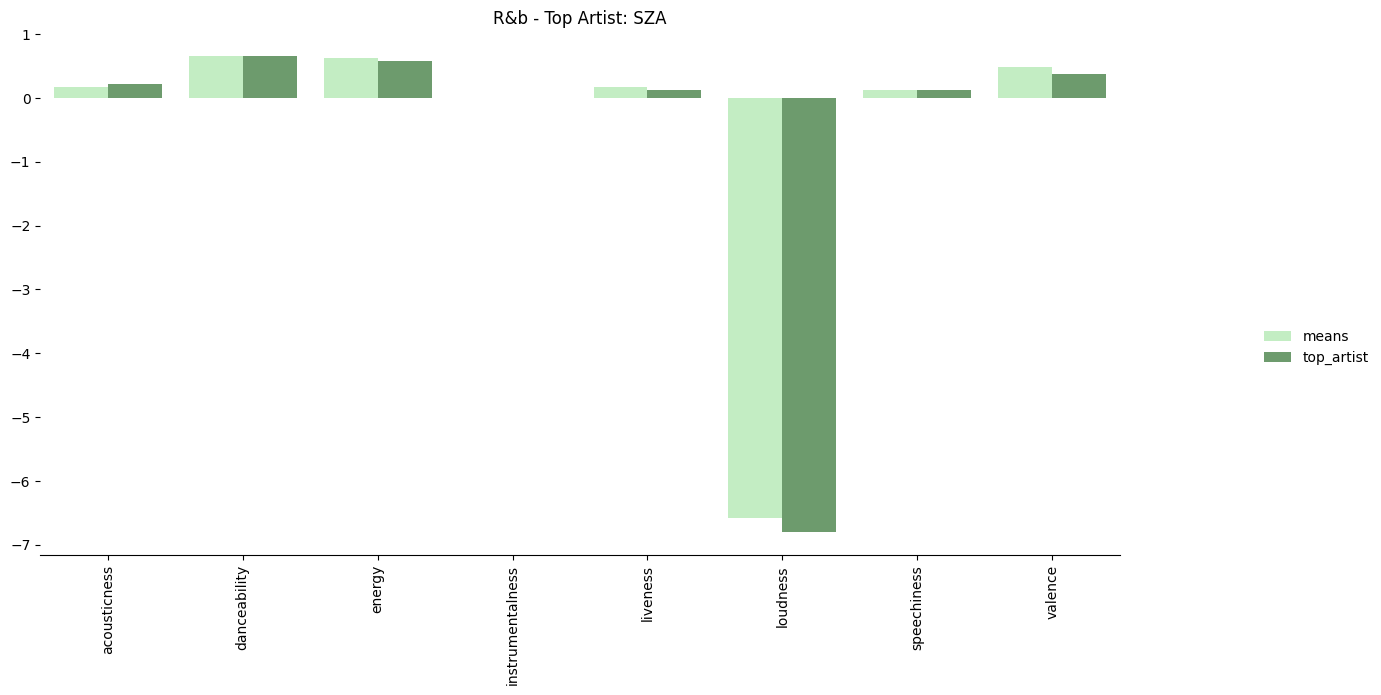

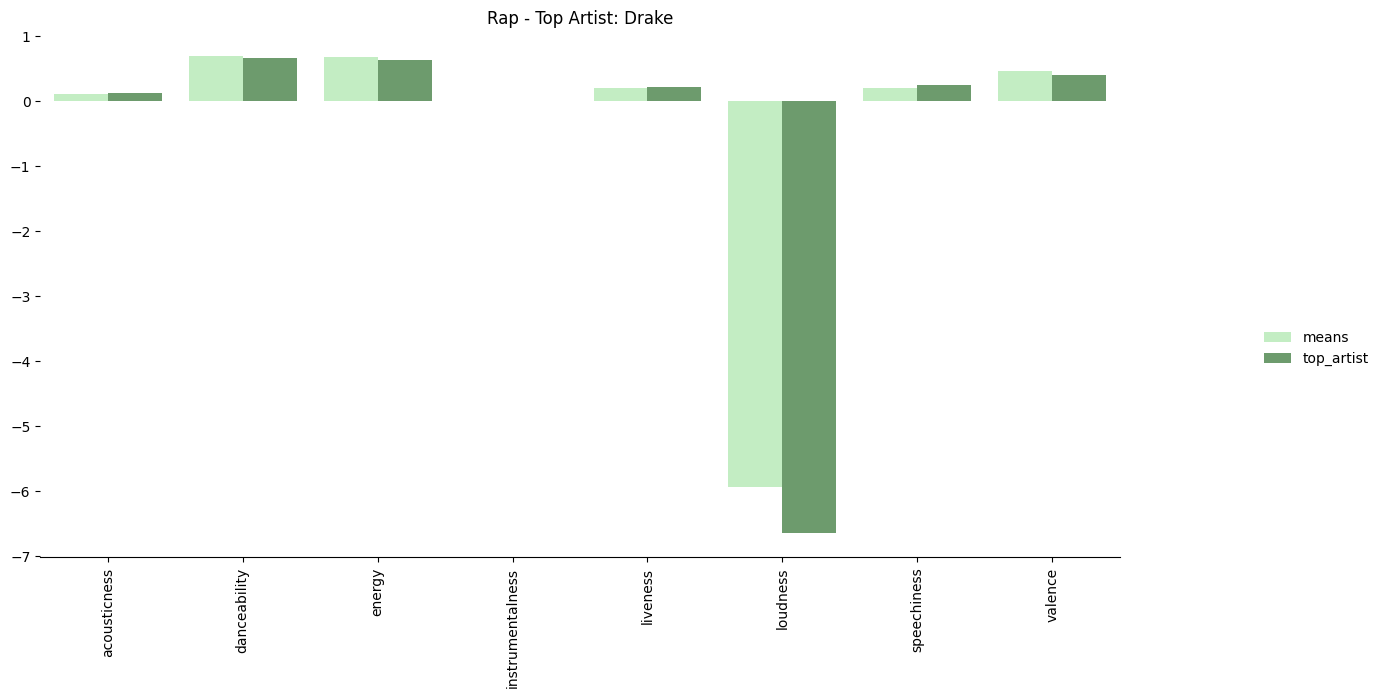

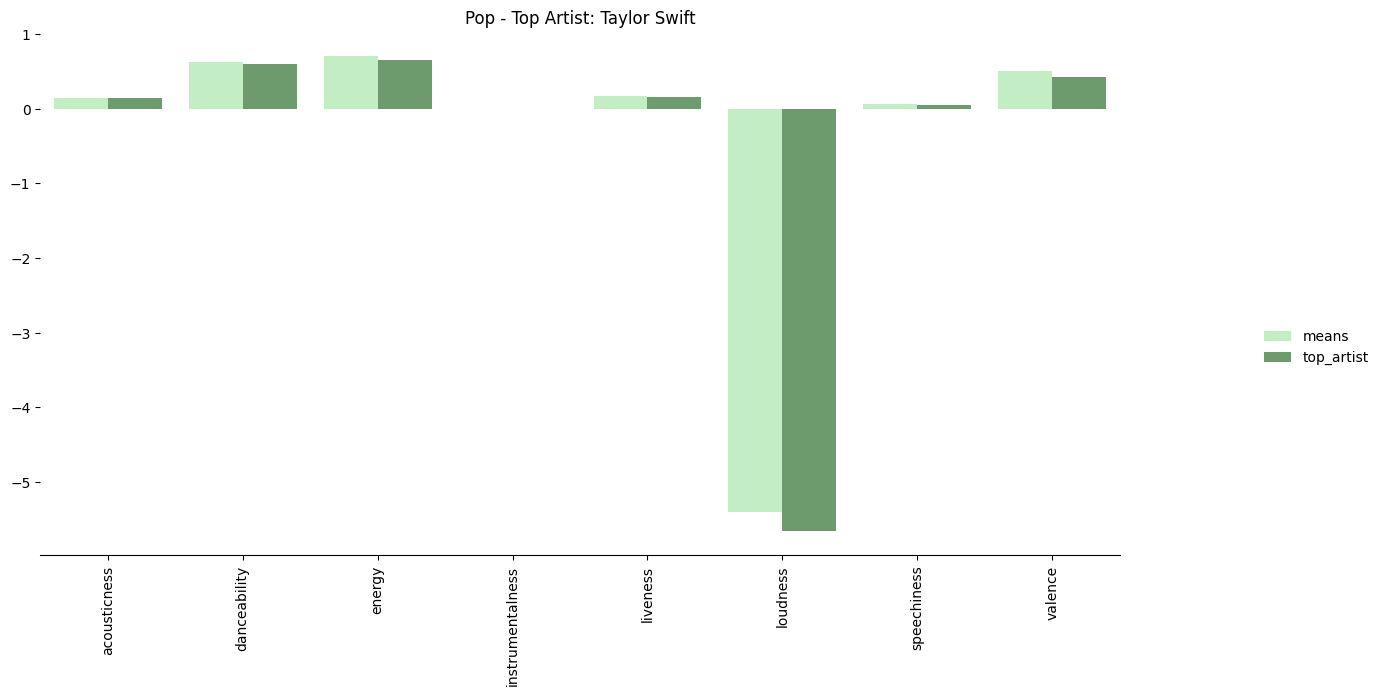

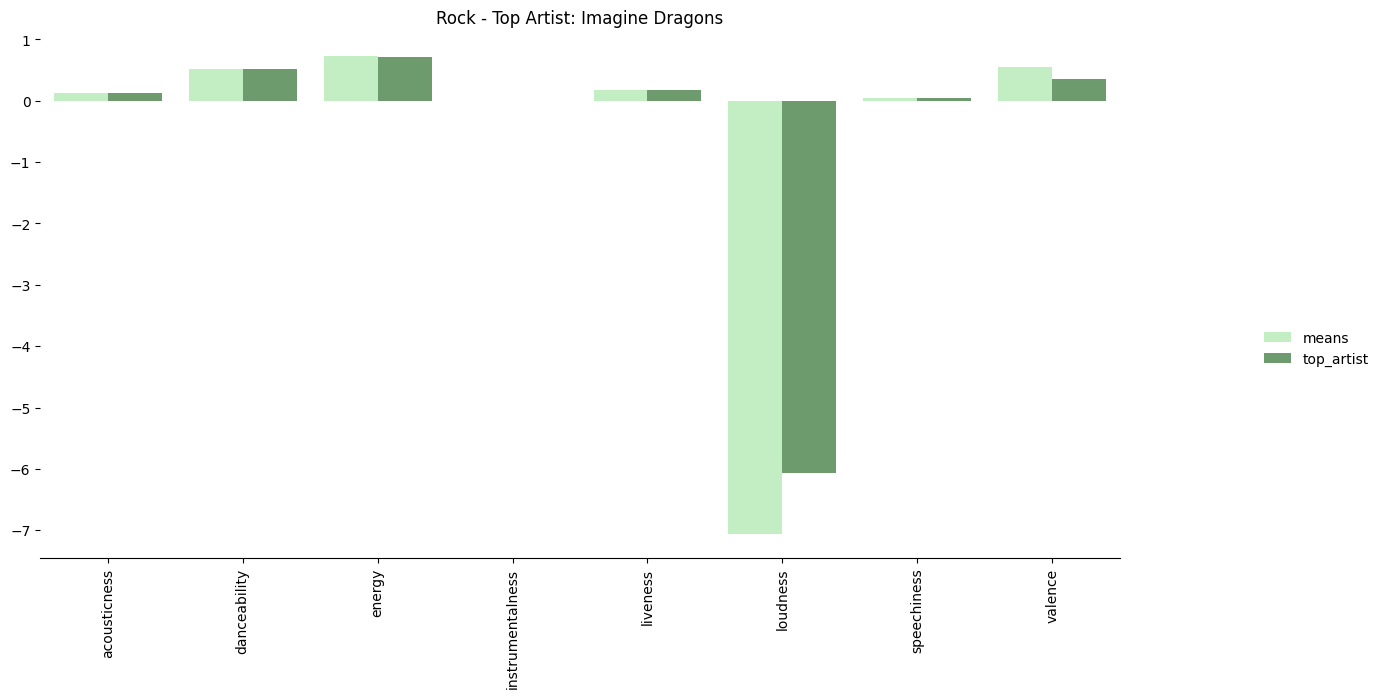

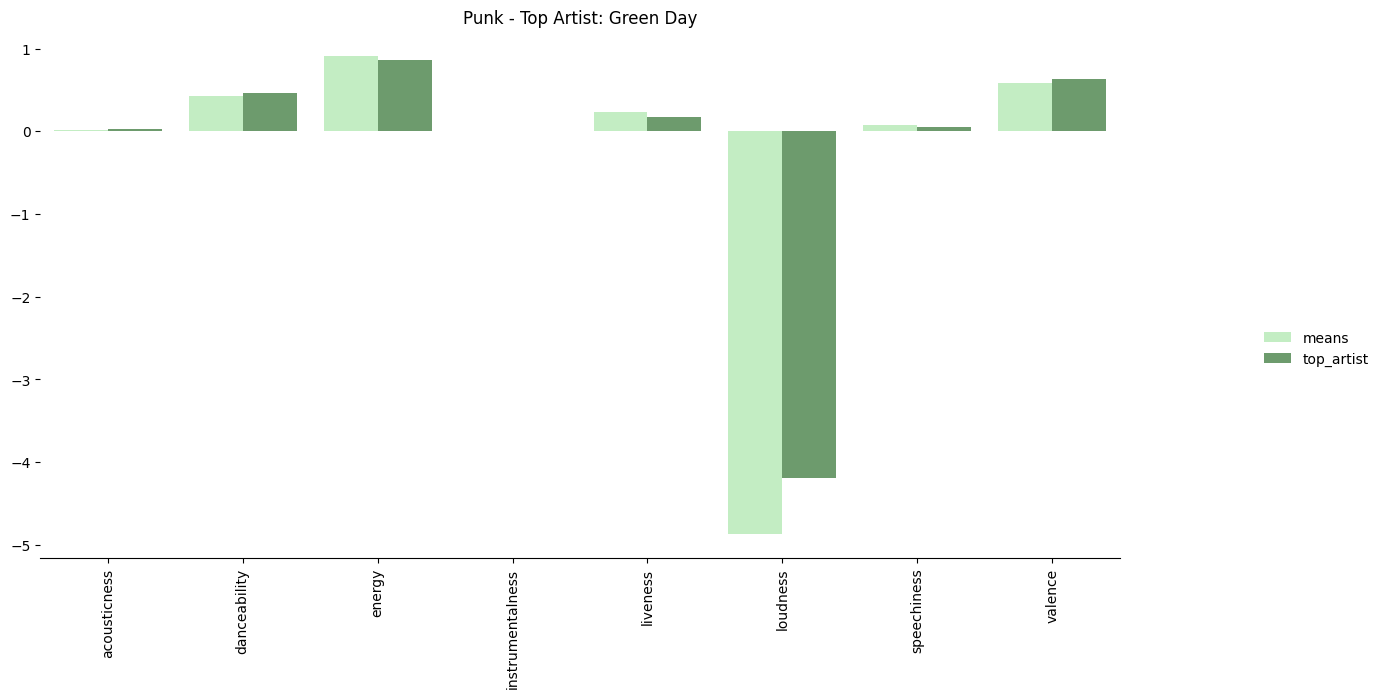

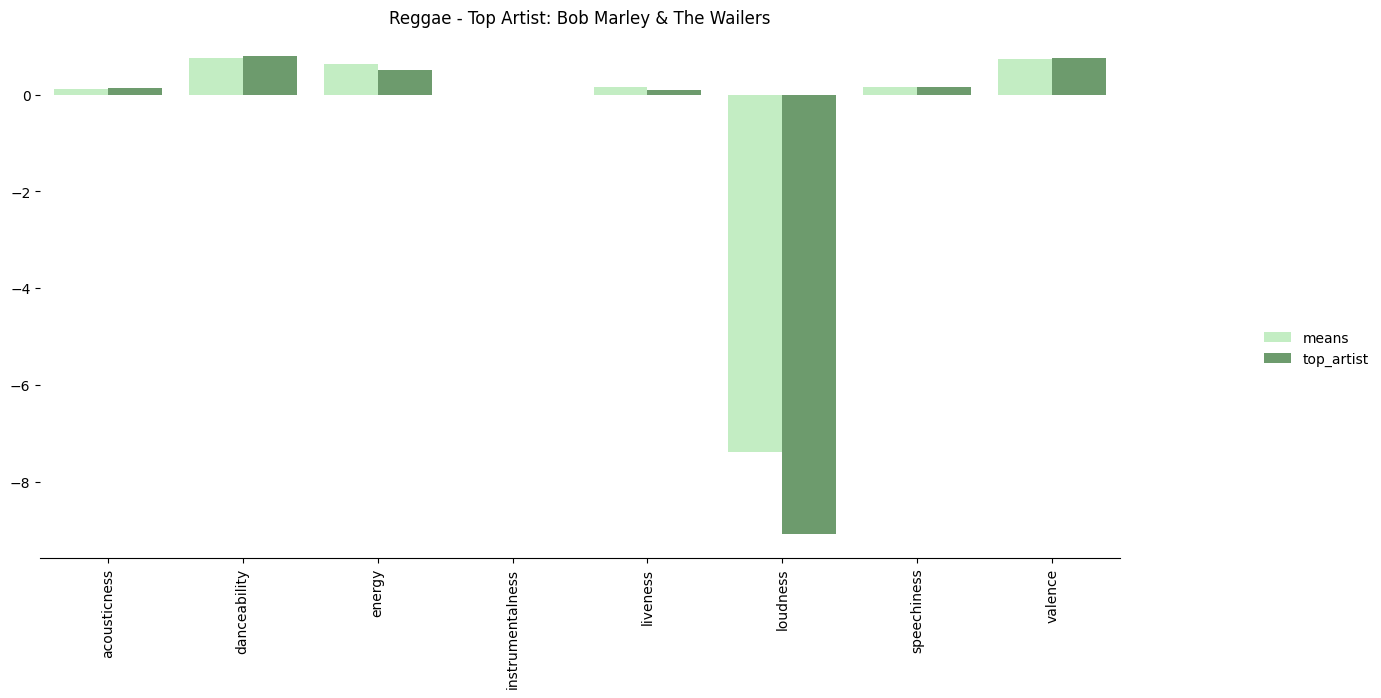

In [41]:
df_top_artist_genre = df_mean_top_artist[['artist_genres'] + features]
df_means_genre = df_means[['artist_genres'] + features]

df_merged = pd.merge(df_top_artist_genre, df_means_genre, on='artist_genres', suffixes=('_top_artist', '_means'))

# transpor as colunas para linhas
df_transformed = df_merged.T

# renomear as colunas para os nomes dos generos
df_transformed.columns = df_transformed.iloc[0]

# remover a linha que virou nome de colunas
df_transformed.drop(df_transformed.index[0], inplace=True)


# renomear o index para feature
df_transformed = df_transformed.reset_index().rename(columns={'index': 'feature'})

# ordenar as features
df_transformed.sort_values(by='feature', inplace = True)

# criar colunas com as features e tipos separados
for i in range(len(df_transformed)):
    df_transformed.loc[i, 'new_feature'] = df_transformed.loc[i, 'feature'].split('_')[0]
    df_transformed.loc[i, 'tipo'] = df_transformed.loc[i, 'feature'].split('_', 1)[1]

# melt o df para plotar o gráfico (colunas de generos viram linhas)
df_transformed = pd.melt(df_transformed, id_vars=['new_feature', 'tipo'], value_vars=generos_artistas, var_name='genero', value_name='valor')


# plot do grafico
for i, genero in enumerate(generos_artistas):
    aux = df_transformed[df_transformed['genero'] == genero]
    g = sns.catplot(
        data=aux, kind="bar",
        x="new_feature", y="valor", hue="tipo",
        palette=sns.color_palette(['lightgreen', 'darkgreen']), alpha=.6, height=6,
    )

    artista = df_top_artists[df_top_artists['artist_genres'] == genero]['artist_name'].values[0]

    g.fig.set_figwidth(15)
    g.fig.set_figheight(6)
    g.despine(left=True)
    g.set_axis_labels("", "")
    g.set_xticklabels(rotation=90)
    g.legend.set_title("")
    g.set(title=f'{genero.capitalize()} - Top Artist: {artista}')
    plt.show()

Olhando por feature...

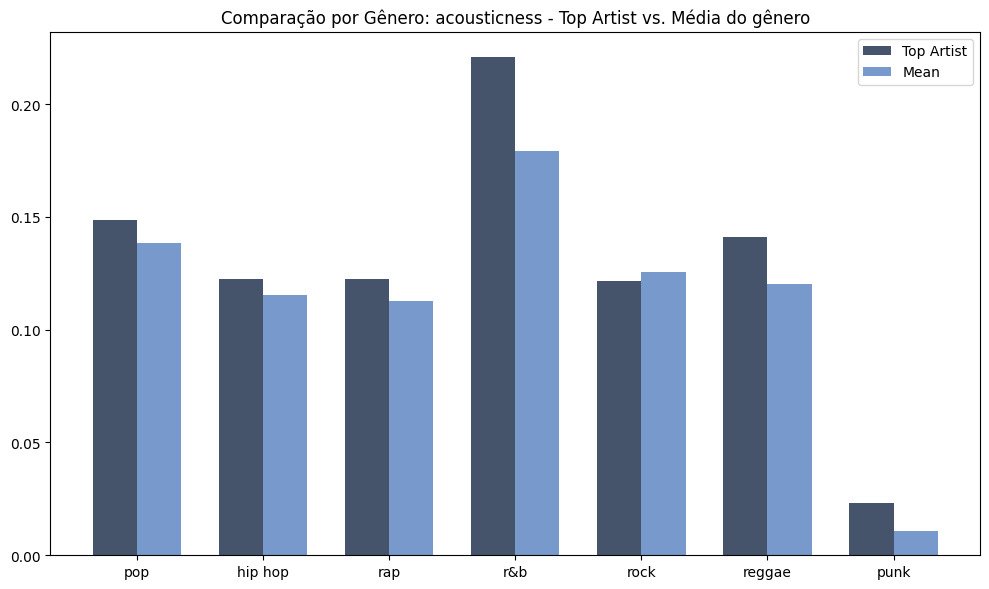

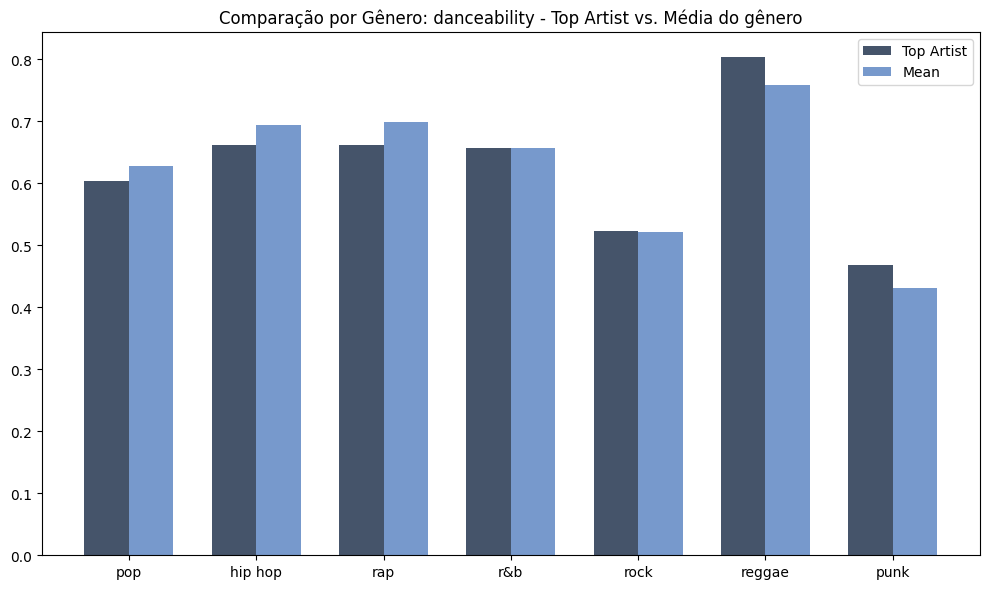

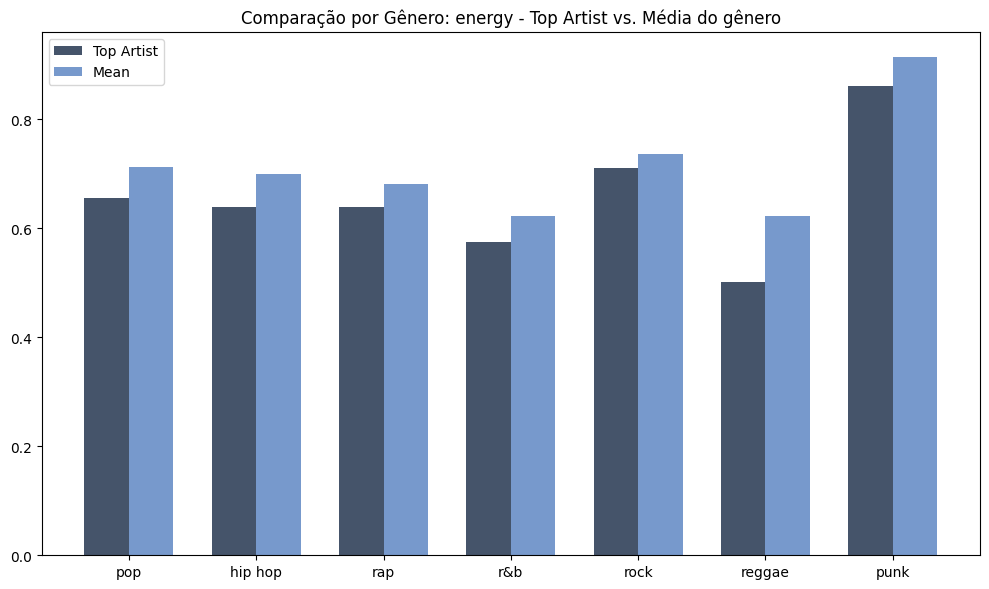

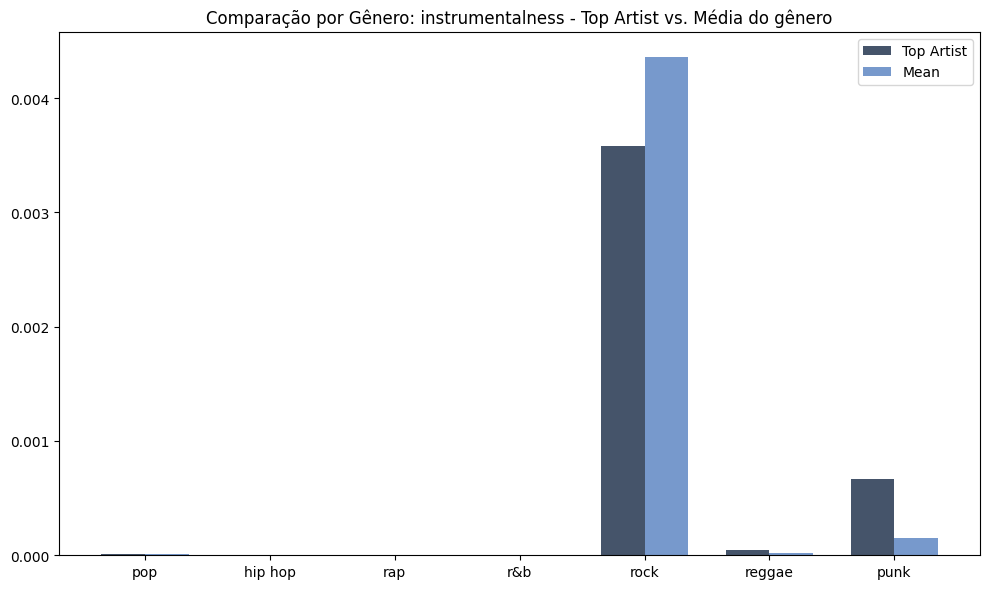

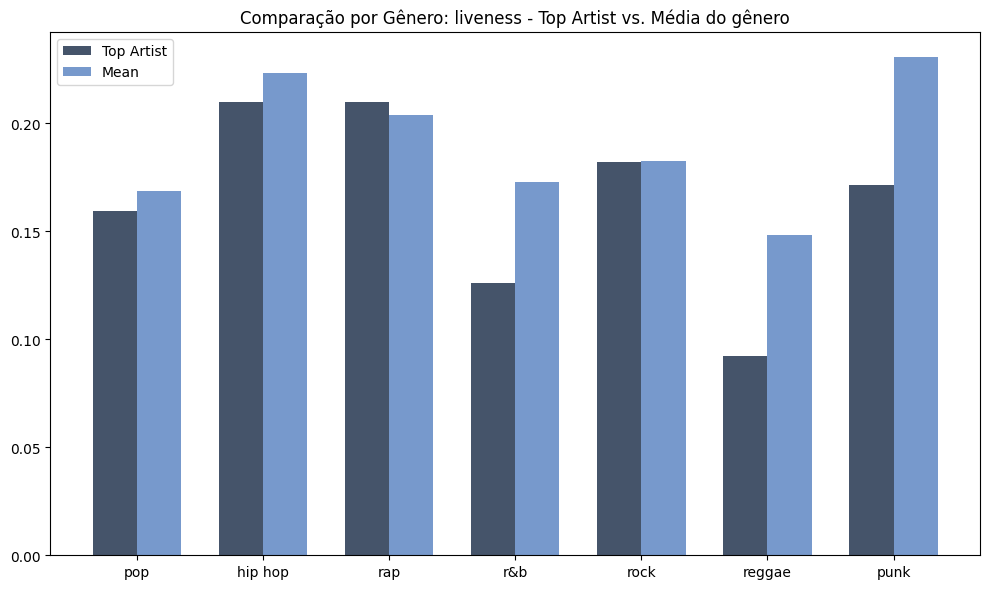

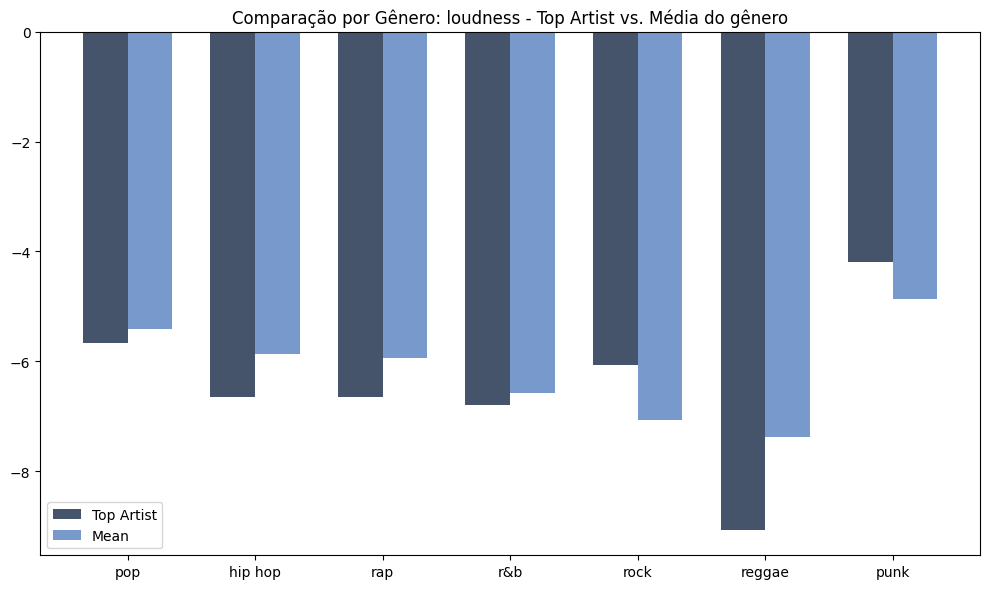

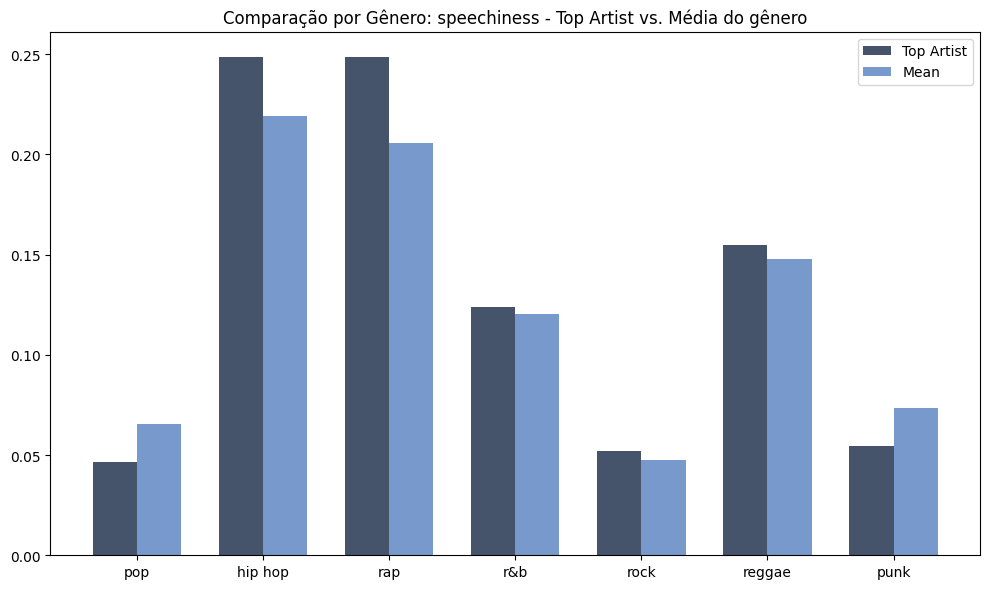

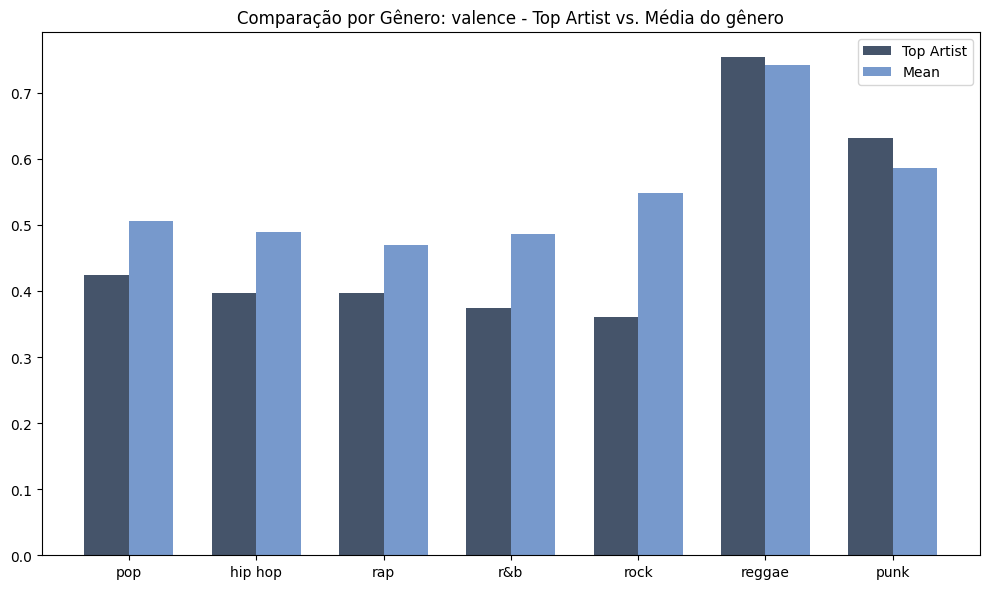

In [42]:
# Filtrar as colunas relevantes nos dataframes
df_top_artist_genre = df_mean_top_artist[['artist_genres'] + features]
df_means_genre = df_means[['artist_genres'] + features]

colors = sns.dark_palette("#79C", 6)

# Iterar sobre as features e criar um gráfico para cada uma
for feature in features:
    # Merge entre os dataframes por gênero
    df_merged = pd.merge(df_top_artist_genre, df_means_genre, on='artist_genres', suffixes=('_top_artist', '_means'))

    # Configurar o gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar as barras de comparação
    width = 0.35  # Largura das barras
    x = list(range(len(df_merged)))  # Converter range em uma lista
    offset_top_artist = -width / 2
    offset_means = width / 2

    ax.bar([val + offset_top_artist for val in x], df_merged[feature + '_top_artist'], width, label='Top Artist', color = colors[2])
    ax.bar([val + offset_means for val in x], df_merged[feature + '_means'], width, label='Mean', color = colors[5])

    # Configurar os rótulos do eixo x
    ax.set_xticks(x)
    ax.set_xticklabels(df_merged['artist_genres'])

    # Configurar o título do gráfico
    ax.set_title(f'Comparação por Gênero: {feature} - Top Artist vs. Média do gênero')

    # Adicionar legenda
    ax.legend()
    ax.grid(False)


    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

### 5.2 Evolução do lançamento de músicas por gênero ao longo dos anos

In [30]:
df_medias_por_genero = df_musicas_sem_outliers.groupby(by = ['artist_genres']).mean()[features].reset_index()
df_medias_por_genero['artist_name'] = 'Média'

df_medias_por_genero

,artist_genres,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,artist_name
0,hip hop,0.115281,0.694415,0.699494,5.699723e-07,0.223162,-5.871314,0.219031,0.488953,Média
1,pop,0.138561,0.627524,0.712321,1.374562e-05,0.168499,-5.404185,0.065521,0.505290,Média
2,punk,0.010628,0.431081,0.914238,1.533948e-04,0.230672,-4.872287,0.073578,0.586829,Média
3,r&b,0.179425,0.656620,0.622730,2.757571e-06,0.172562,-6.573875,0.120208,0.486823,Média
4,rap,0.112758,0.698409,0.681141,2.062103e-07,0.203539,-5.947532,0.205896,0.469953,Média
5,reggae,0.120168,0.758231,0.622953,2.270335e-05,0.148338,-7.375038,0.147621,0.742000,Média
6,rock,0.125438,0.521476,0.735931,4.360767e-03,0.182234,-7.067376,0.047579,0.548152,Média


In [31]:
# Pega o top 1 artista de cada genero, ordenado por popularidade

top1_por_genero = df_musicas.groupby('artist_genres').apply(lambda x: x.sort_values(by=['artist_popularity'], ascending=False).head(1)).reset_index(drop=True)[['artist_name', 'artist_genres', 'artist_popularity']]

top1_por_genero

,artist_name,artist_genres,artist_popularity
0,Drake,hip hop,96
1,Taylor Swift,pop,100
2,Green Day,punk,79
3,SZA,r&b,90
4,Drake,rap,96
5,Bob Marley & The Wailers,reggae,79
6,Imagine Dragons,rock,88


In [32]:
df_top_artistas = df_musicas_sem_outliers.groupby(['artist_genres', 'artist_name']).mean()[features].reset_index()

df_artistas = pd.DataFrame()
for nome, genero in zip(top1_por_genero['artist_name'], top1_por_genero['artist_genres']):
    aux = df_top_artistas[(df_top_artistas['artist_name'] == nome) & (df_top_artistas['artist_genres'] == genero)]
    aux = aux.reset_index(drop=True)
    df_artistas = pd.concat([df_artistas, aux], ignore_index=True)

df_artistas

,artist_genres,artist_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
0,hip hop,Drake,0.124237,0.658268,0.635592,7.338732e-07,0.212704,-6.693085,0.248722,0.393331
1,pop,Taylor Swift,0.148626,0.602871,0.654629,1.017903e-05,0.159485,-5.662629,0.046711,0.424460
2,punk,Green Day,0.011280,0.460714,0.882000,2.491905e-05,0.182819,-3.910762,0.056667,0.629862
3,r&b,SZA,0.259711,0.656222,0.566278,1.648333e-06,0.126311,-6.914889,0.150939,0.387111
4,rap,Drake,0.120420,0.664412,0.641412,3.361069e-07,0.206649,-6.616015,0.248653,0.401611
5,reggae,Bob Marley & The Wailers,0.140980,0.803630,0.501783,4.252152e-05,0.092122,-9.080283,0.154620,0.754500
6,rock,Imagine Dragons,0.114404,0.516116,0.708721,5.649520e-03,0.188491,-6.295977,0.050500,0.343228


In [33]:
df = pd.concat([df_artistas, df_medias_por_genero], ignore_index=True)
df

,artist_genres,artist_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
0,hip hop,Drake,0.124237,0.658268,0.635592,7.338732e-07,0.212704,-6.693085,0.248722,0.393331
1,pop,Taylor Swift,0.148626,0.602871,0.654629,1.017903e-05,0.159485,-5.662629,0.046711,0.424460
2,punk,Green Day,0.011280,0.460714,0.882000,2.491905e-05,0.182819,-3.910762,0.056667,0.629862
3,r&b,SZA,0.259711,0.656222,0.566278,1.648333e-06,0.126311,-6.914889,0.150939,0.387111
4,rap,Drake,0.120420,0.664412,0.641412,3.361069e-07,0.206649,-6.616015,0.248653,0.401611
5,reggae,Bob Marley & The Wailers,0.140980,0.803630,0.501783,4.252152e-05,0.092122,-9.080283,0.154620,0.754500
6,rock,Imagine Dragons,0.114404,0.516116,0.708721,5.649520e-03,0.188491,-6.295977,0.050500,0.343228
7,hip hop,Média,0.115281,0.694415,0.699494,5.699723e-07,0.223162,-5.871314,0.219031,0.488953
8,pop,Média,0.138561,0.627524,0.712321,1.374562e-05,0.168499,-5.404185,0.065521,0.505290
9,punk,Média,0.010628,0.431081,0.914238,1.533948e-04,0.230672,-4.872287,0.073578,0.586829


In [34]:
df_generos_por_data = df_musicas_sem_outliers.groupby(['artist_genres', 'album_release_date'])['artist_name'].count().reset_index().rename(columns={'artist_name': 'count'})
df_generos_por_data

,artist_genres,album_release_date,count
0,hip hop,1984-03-27,2
1,hip hop,1985-01-21,1
2,hip hop,1986-05-15,1
3,hip hop,1986-11-15,4
4,hip hop,1987-07-07,1
...,...,...,...
4132,rock,2017-10-20,1
4133,rock,2017-10-25,1
4134,rock,2017-10-27,4
4135,rock,2017-11-10,1


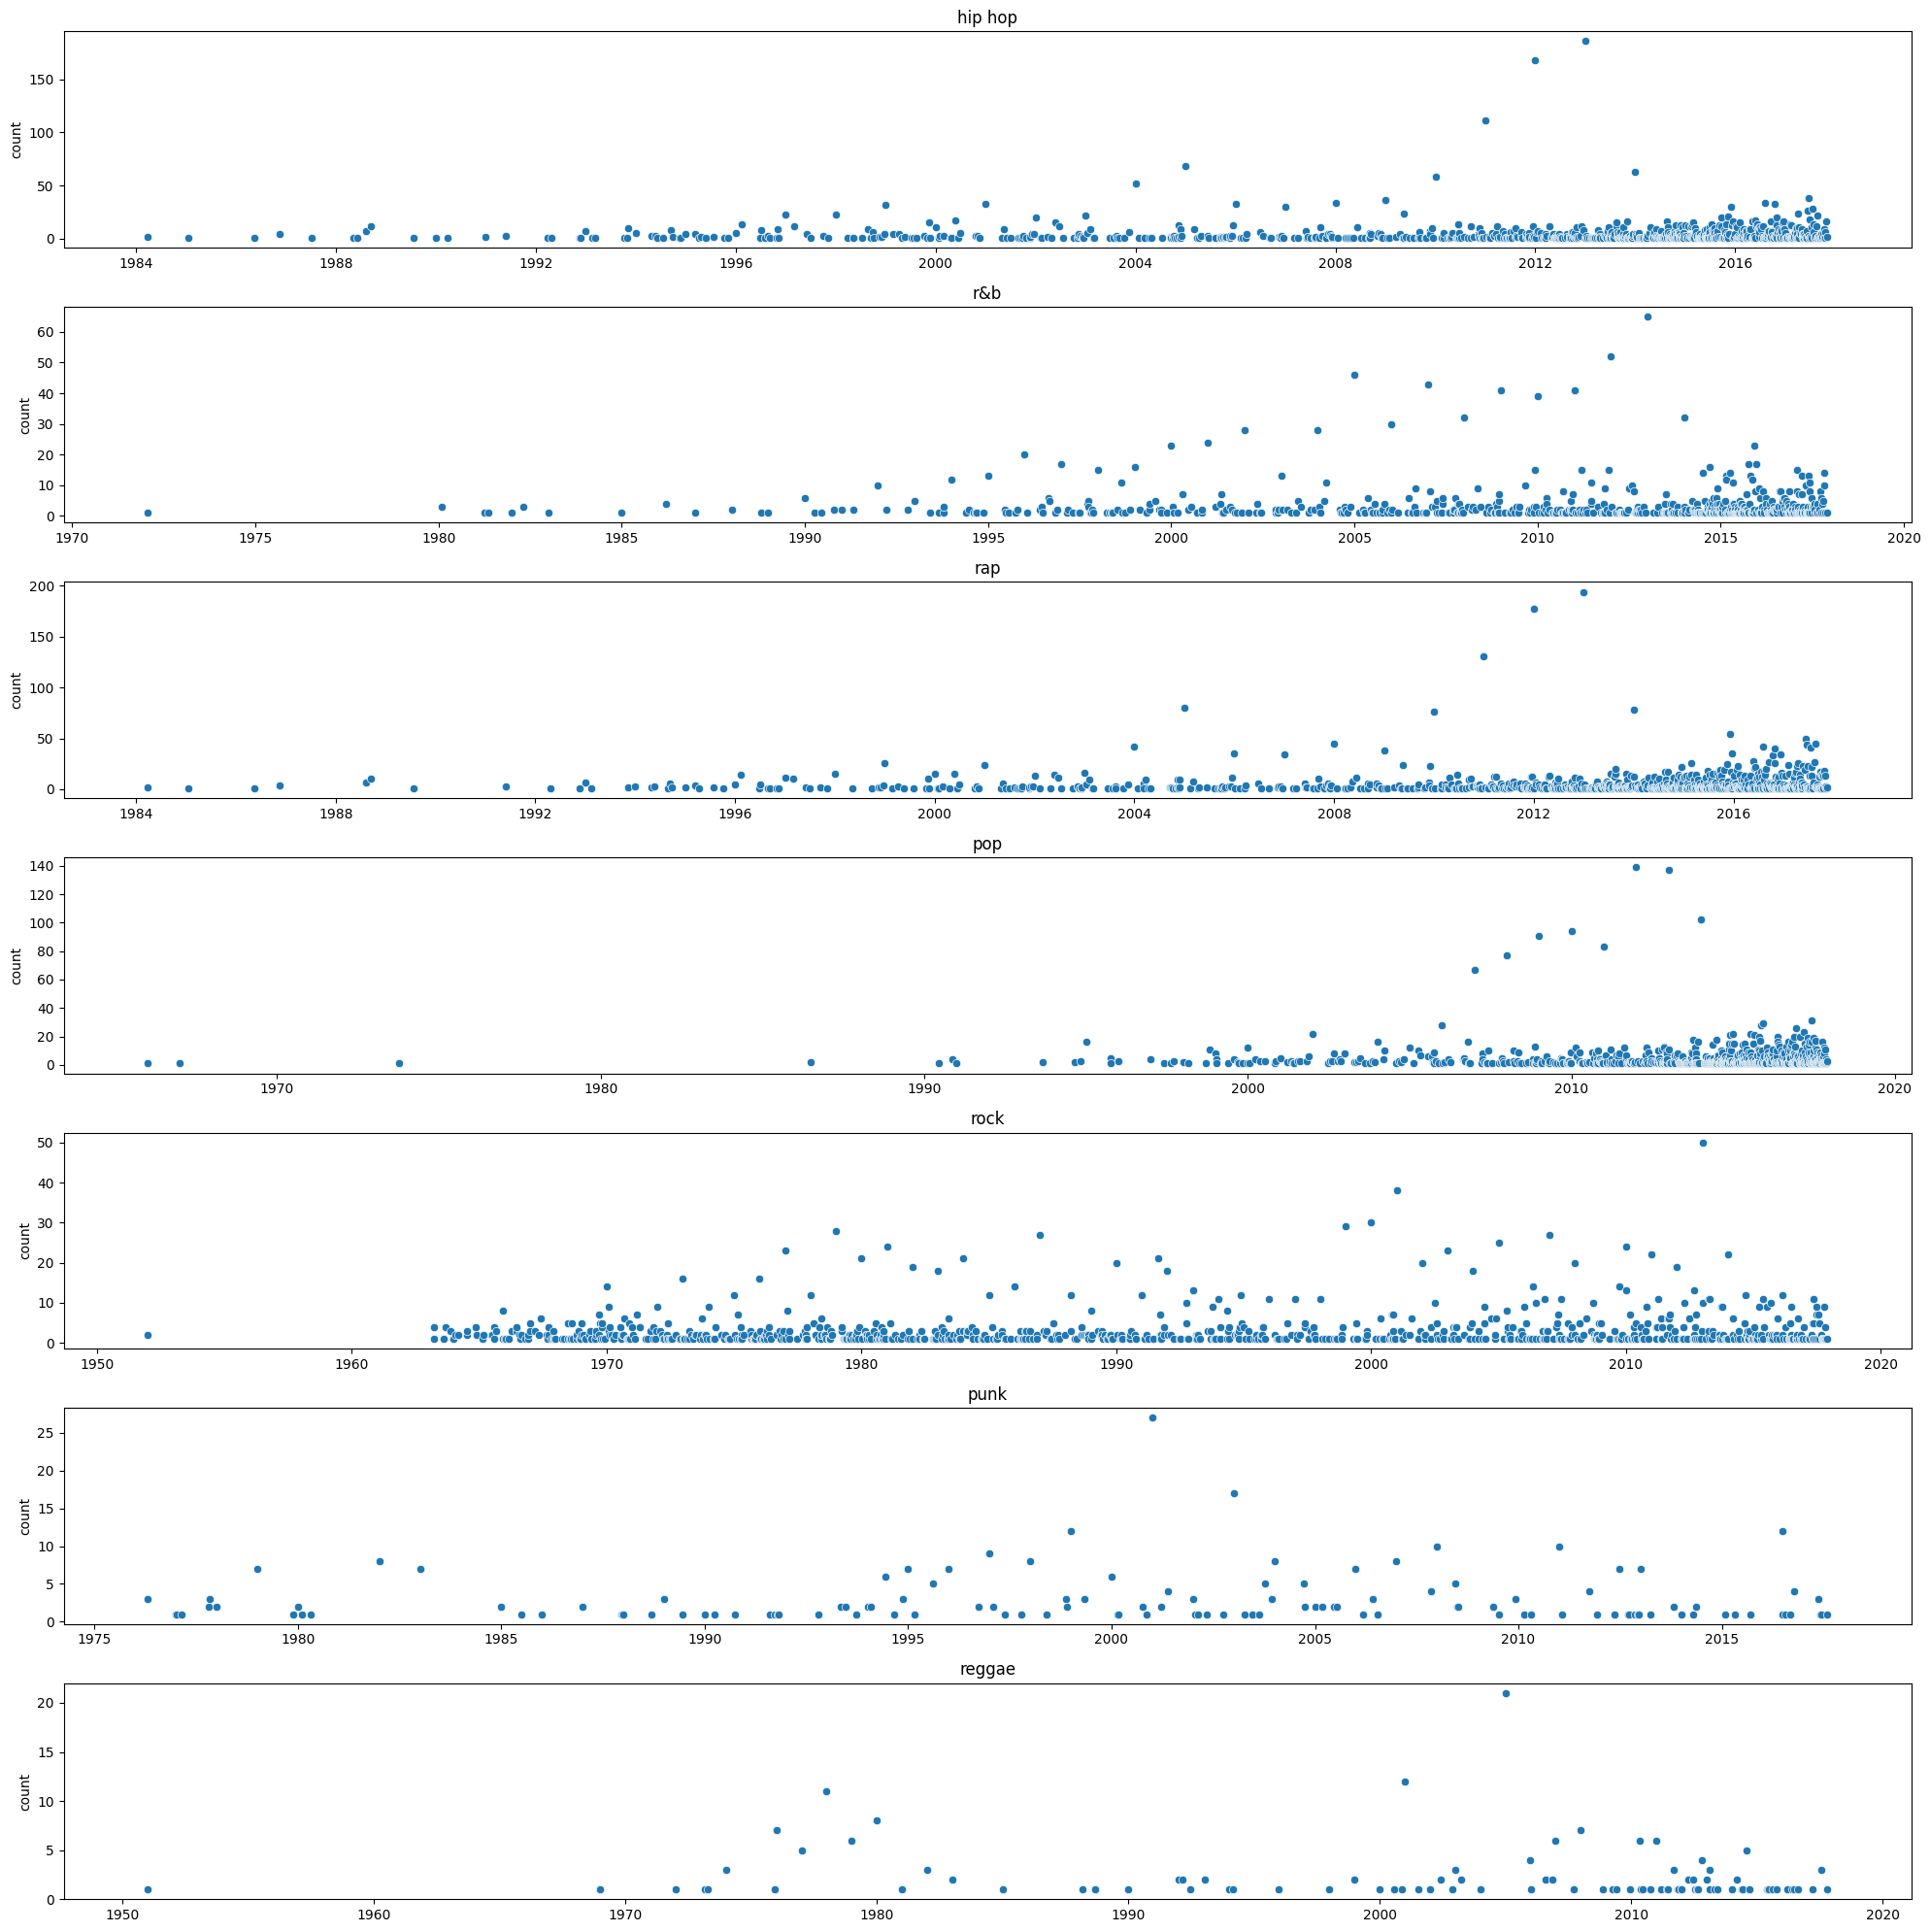

In [35]:
fig, axis = plt.subplots(7, 1, figsize=(20, 20))

for i, genero in enumerate(generos_artistas):
    sns.scatterplot(data = df_generos_por_data[df_generos_por_data['artist_genres'] == genero], x = 'album_release_date', y = 'count', ax = axis[i])
    axis[i].set_title(f'{genero}')
    axis[i].set_xlabel(None)
plt.tight_layout()
plt.show()

In [ ]:
df_features_por_data = df_musicas_sem_outliers.groupby('album_release_date').mean()[features].reset_index()

df_features_por_data

,album_release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1951-01-01,0.020500,0.735000,0.514000,0.000000e+00,0.031600,-12.180000,0.141000,128.865000,0.817000
1,1952-01-01,0.529500,0.603000,0.424000,2.646500e-03,0.282500,-11.442500,0.038850,108.091500,0.728500
2,1963-03-22,0.421500,0.532000,0.783750,3.349350e-04,0.104425,-8.440250,0.047750,141.793000,0.855500
3,1963-03-25,0.661000,0.550000,0.854000,0.000000e+00,0.112000,-5.968000,0.036000,159.231000,0.965000
4,1963-08-06,0.623000,0.659000,0.585000,2.130000e-04,0.348000,-8.189000,0.028800,104.111000,0.784000
...,...,...,...,...,...,...,...,...,...,...
2144,2017-11-10,0.228978,0.539222,0.586111,5.177778e-06,0.141489,-5.065333,0.170022,114.279111,0.263778
2145,2017-11-15,0.071800,0.434000,0.606000,8.670000e-06,0.108000,-5.647000,0.046400,139.760000,0.239000
2146,2017-11-17,0.280600,0.662500,0.636000,3.500000e-07,0.119875,-5.851250,0.145875,135.012500,0.534750
2147,2017-11-24,0.063715,0.570333,0.889000,1.790000e-06,0.159067,-3.466333,0.086667,111.305000,0.524333


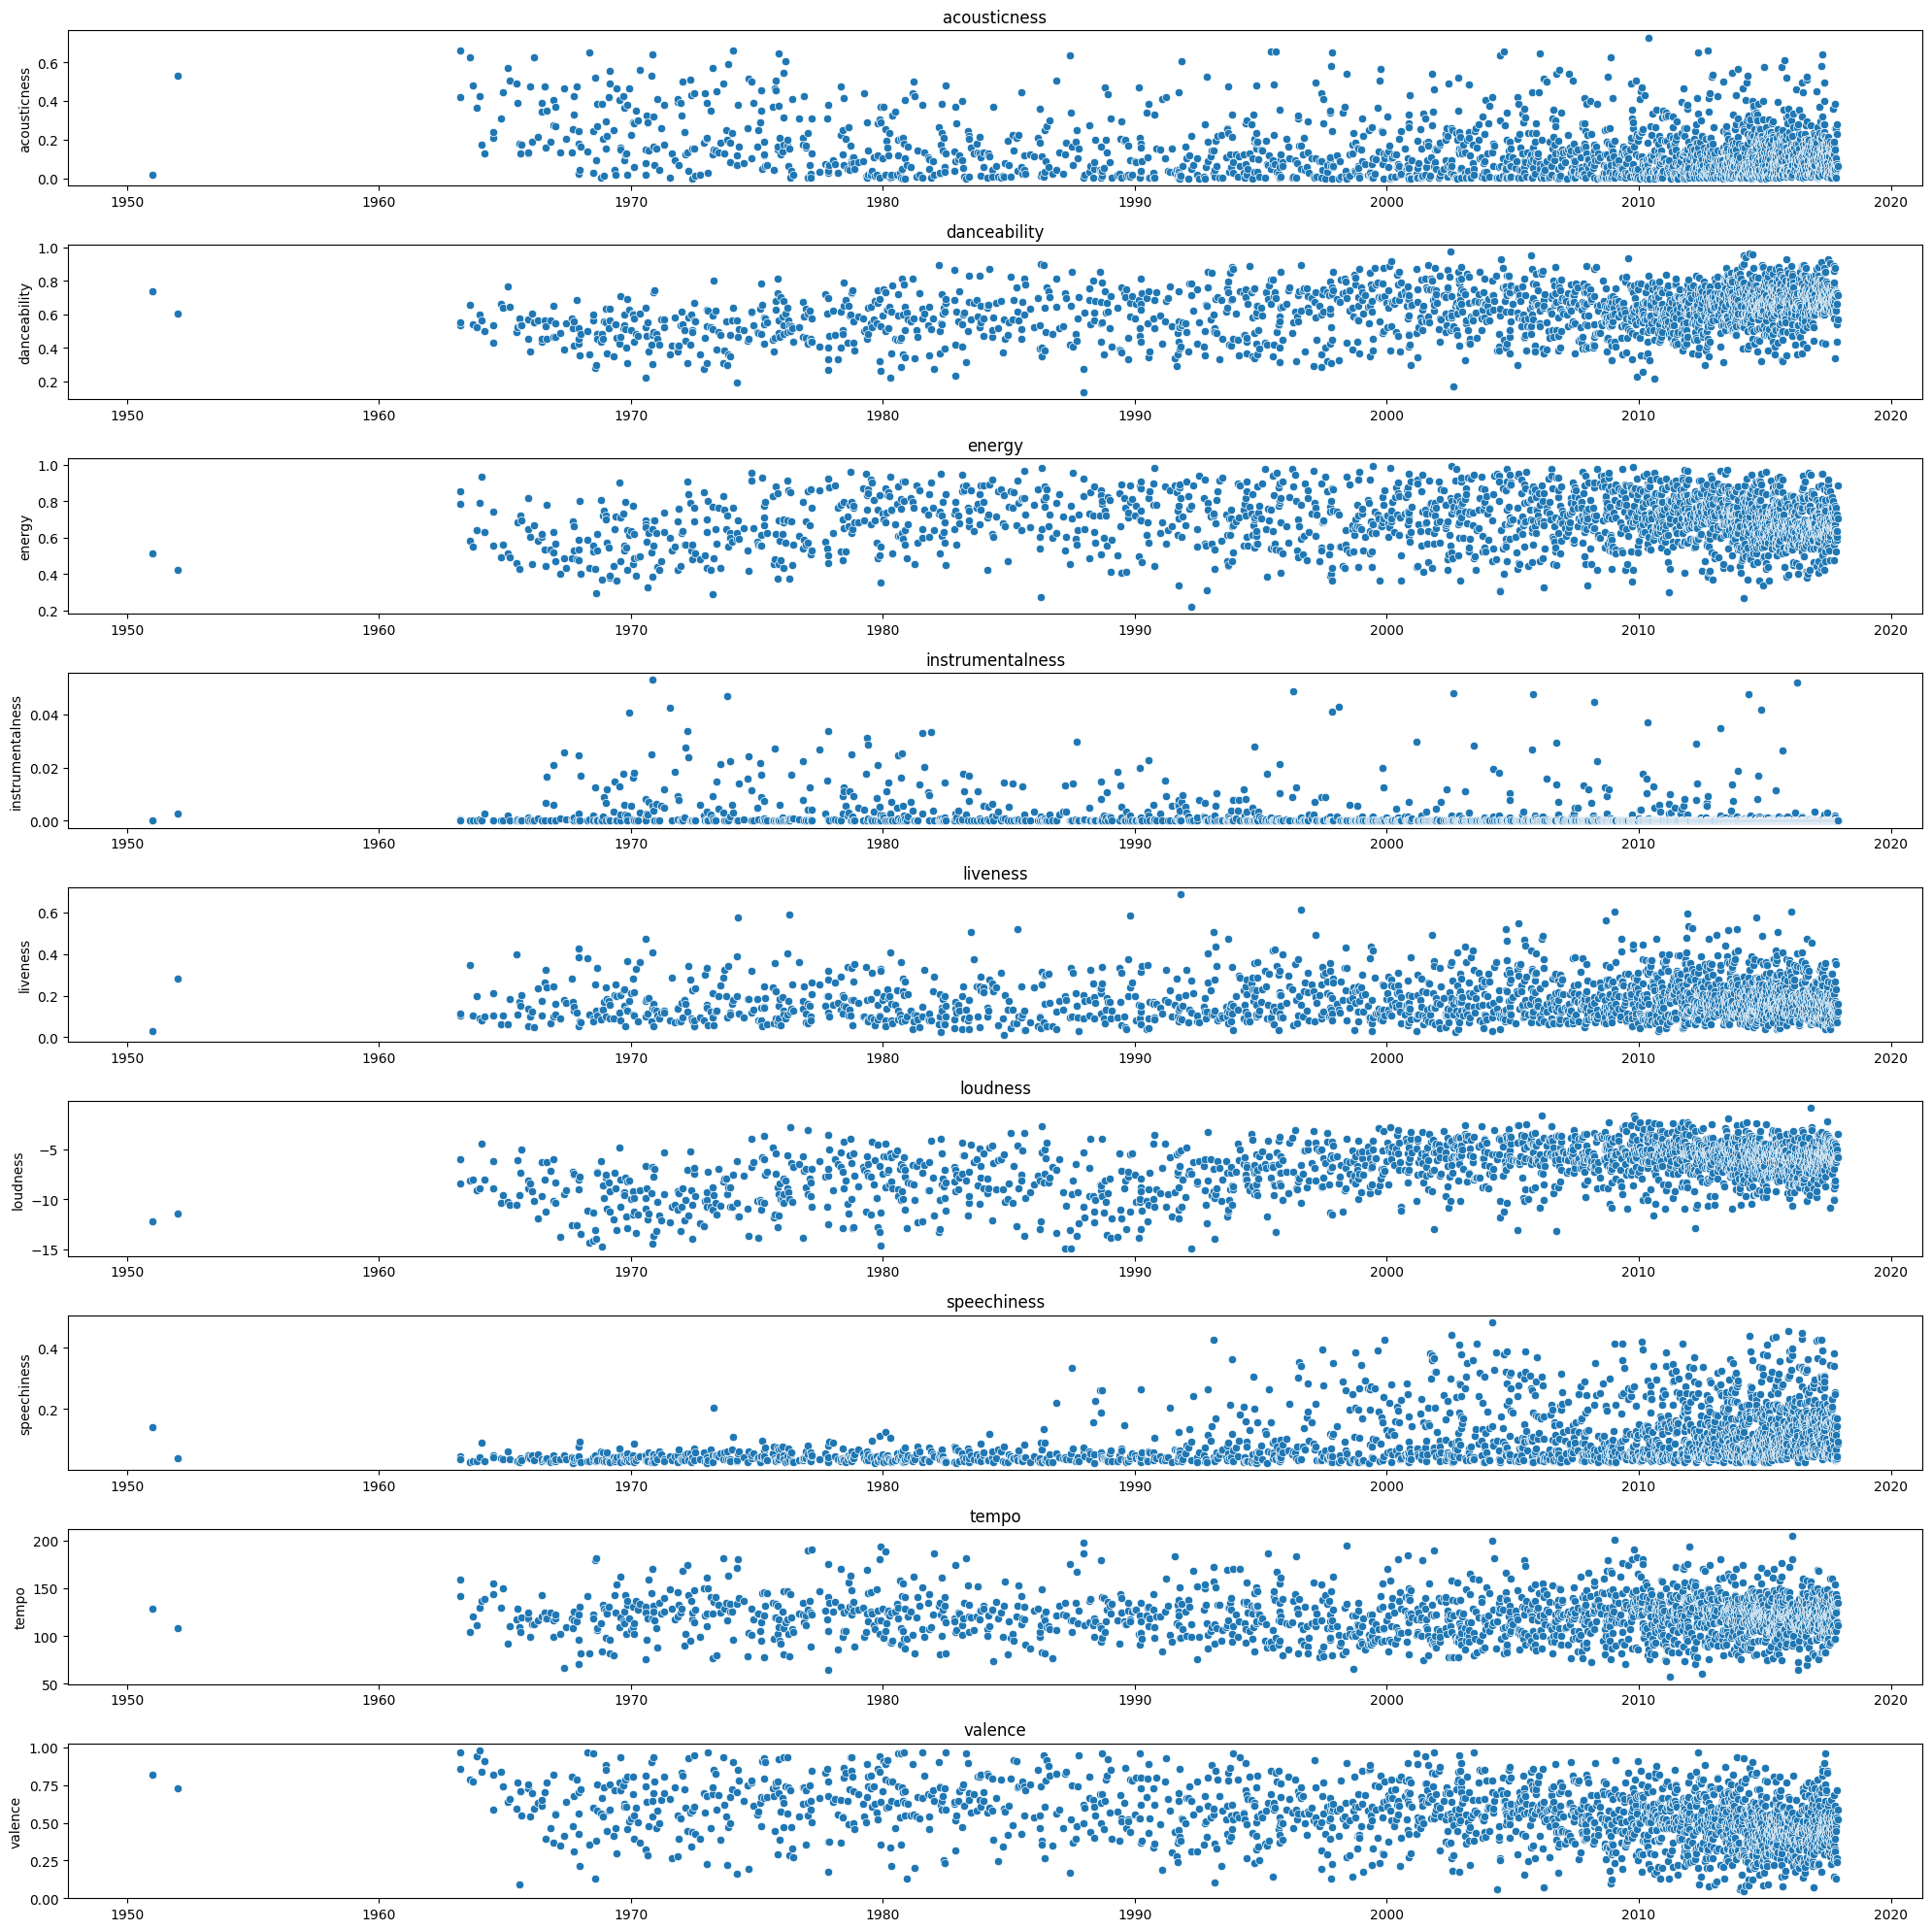

In [ ]:
fig, axis = plt.subplots(9, 1, figsize=(20, 20))

for i, feature in enumerate(features):
    df = df_features_por_data[['album_release_date', feature]]
    sns.scatterplot(data = df, x = 'album_release_date', y = feature, ax = axis[i])
    axis[i].set_title(f'{feature}')
    axis[i].set_xlabel(None)
plt.tight_layout()
plt.show()

Houve uma diminuição na aparição de acousticness e instrumentalness ao longo dos anos. 

Por outro lado, as features de danceability, energy, loudness e speechiness aumentaram nesse período. 

## 6. Referências

[Documentação do Pandas](https://pandas.pydata.org/docs/index.html)

[Documentação do Seaborn](https://seaborn.pydata.org/index.html)

[Documentação do Matplotlib](https://matplotlib.org/ )

[Documentação do Numpy](https://numpy.org/)

[Spotify Music Data Analysis](https://medium.com/analytics-vidhya/spotify-music-data-analysis-part-1-c8457bfc53a)

[Spotify Data Visualization and Analysis using Python](https://medium.com/geekculture/spotify-data-visualization-and-analysis-using-python-4af81c5531a7)

